# Libraries

In [1]:
import pandas as pd
import numpy as np
import dash
from dash import Dash
import seaborn as sns
from dash import html
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

# Reading Data

In [2]:
df = pd.read_csv('/Users/vishal/Desktop/Way to New World/University/01_All_Semesters/02_Semester/01_Visualization of Complex Data/05_Projects/Patient-Survival-Prediction---Dash-Visualization/dataset/Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [4]:
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
Null_Values = df.isna().sum()/len(df)
Null_Values.sort_values(ascending=False, inplace=True)
round(Null_Values,2)

h1_bilirubin_min         0.92
h1_bilirubin_max         0.92
h1_lactate_max           0.92
h1_lactate_min           0.92
h1_albumin_max           0.91
                         ... 
icu_type                 0.00
pre_icu_los_days         0.00
readmission_status       0.00
apache_post_operative    0.00
encounter_id             0.00
Length: 186, dtype: float64

In [10]:
df_dropped = df.copy()
for cols in df_dropped.columns:
    if df_dropped[cols].isna().sum()/len(df_dropped) > 0.40:
        df_dropped = df_dropped.drop(cols, axis=1)

In [12]:
df_dropped.isna().sum()/len(df_dropped)

encounter_id                   0.000000
patient_id                     0.000000
hospital_id                    0.000000
hospital_death                 0.000000
age                            0.046100
                                 ...   
leukemia                       0.007796
lymphoma                       0.007796
solid_tumor_with_metastasis    0.007796
apache_3j_bodysystem           0.018122
apache_2_bodysystem            0.018122
Length: 112, dtype: float64

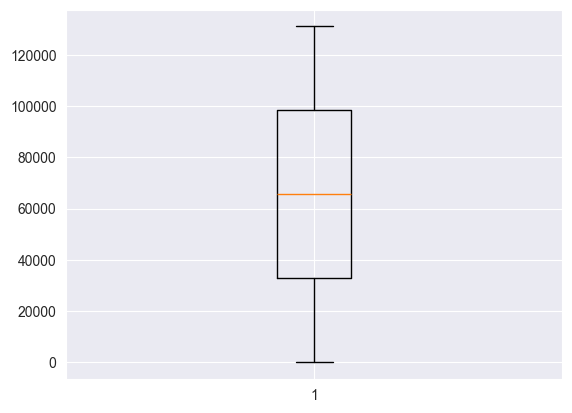

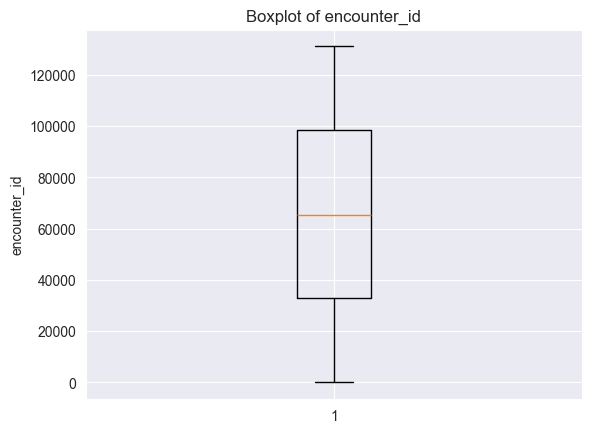

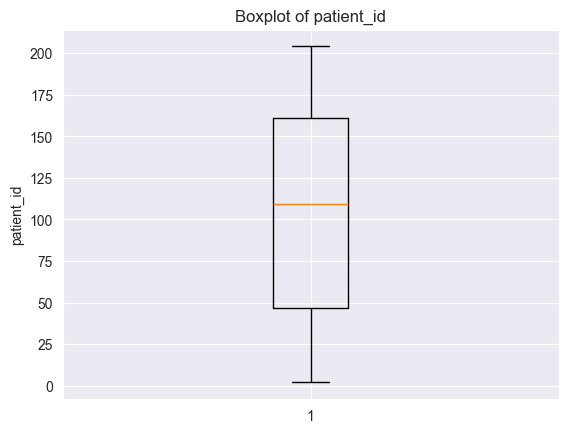

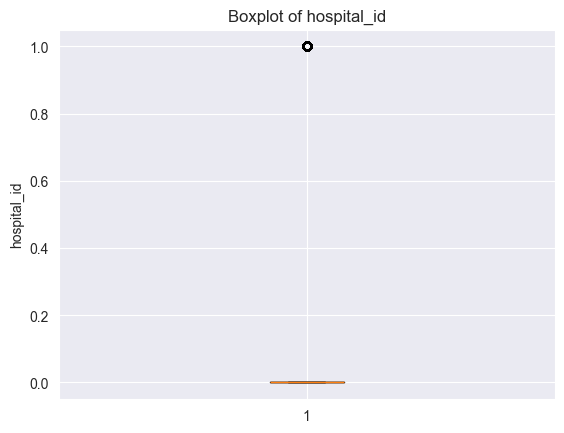

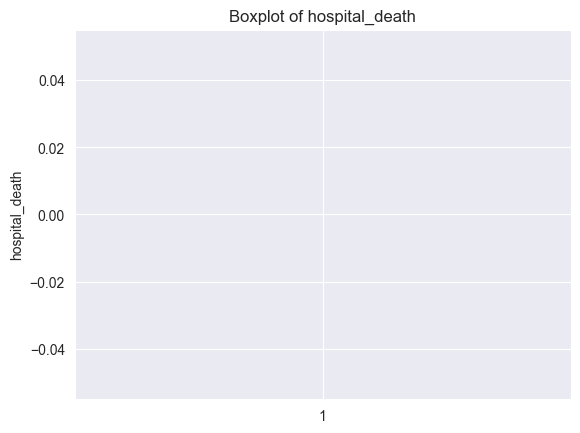

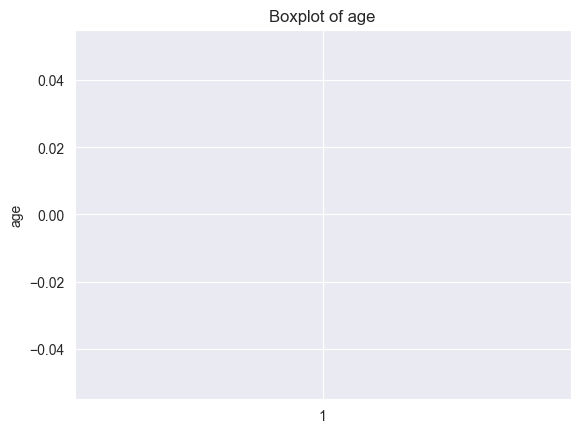

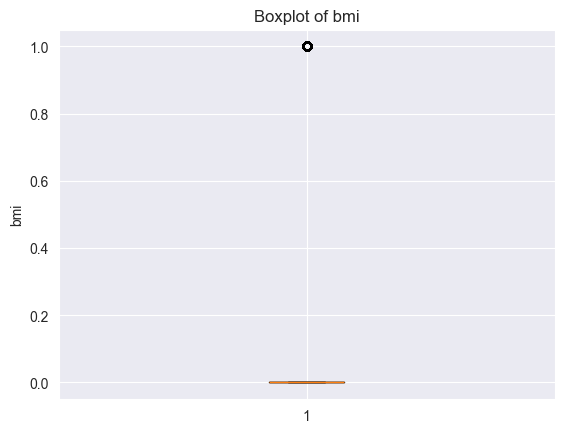

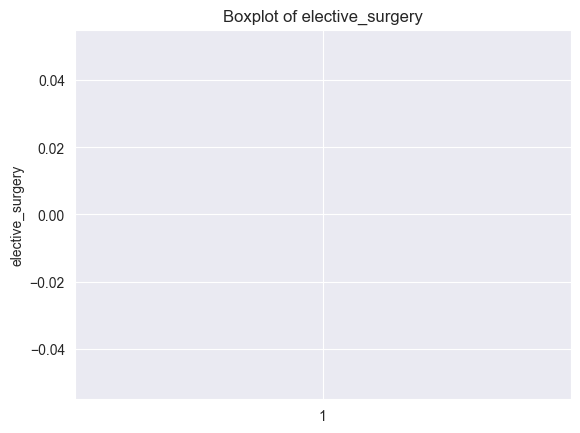

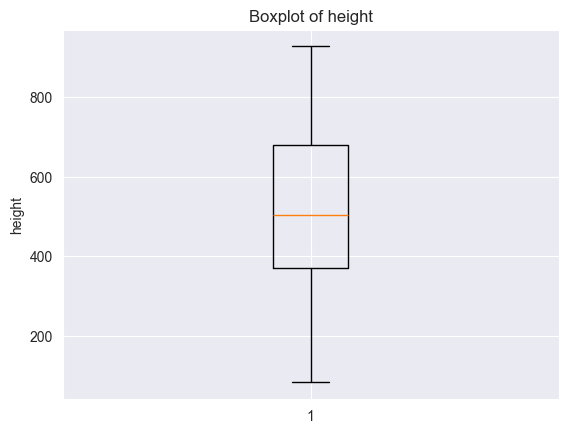

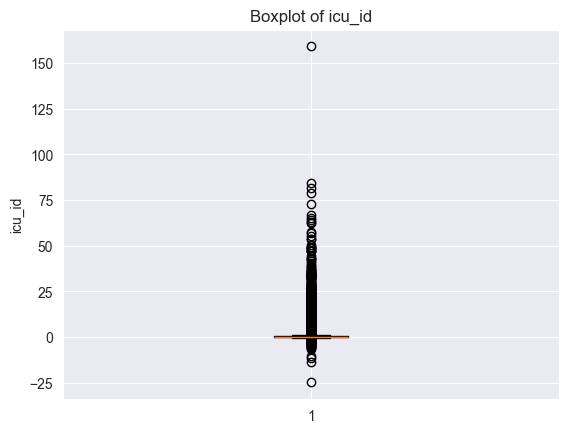

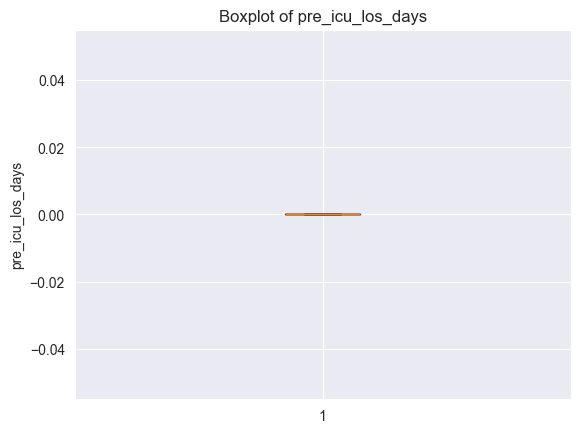

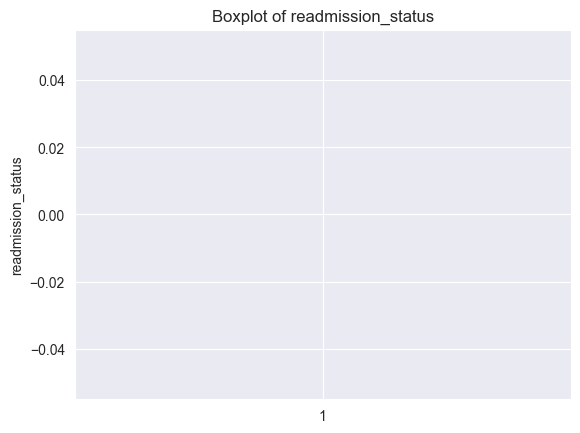

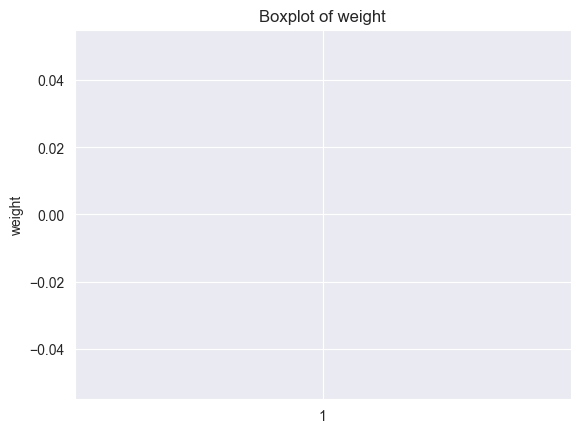

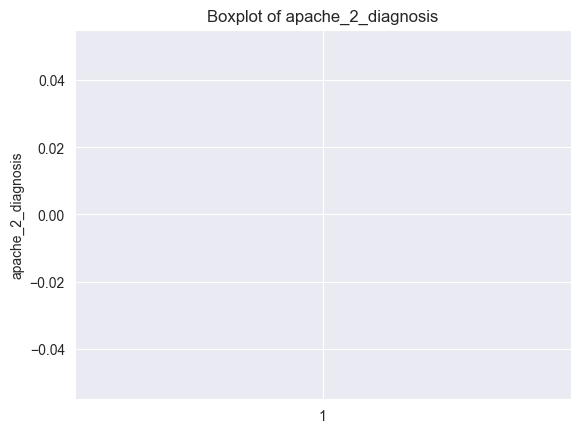

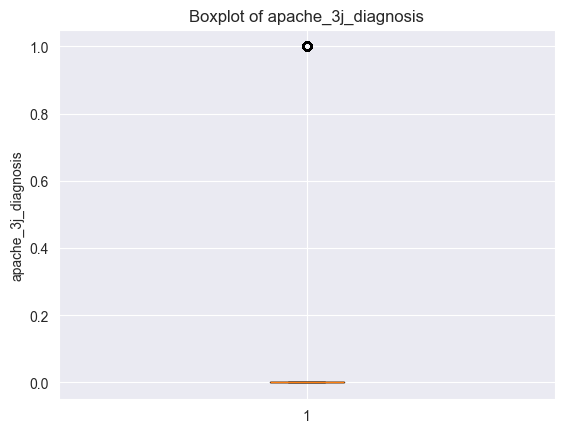

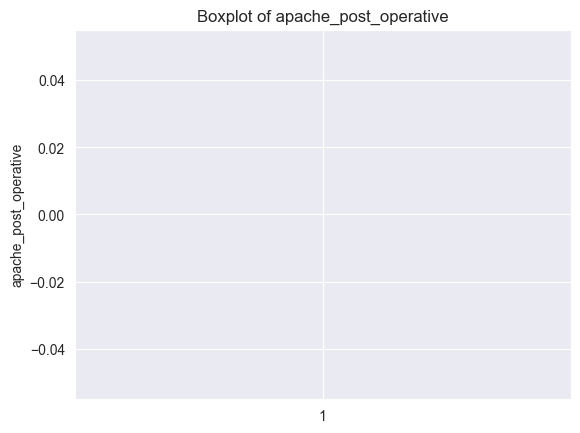

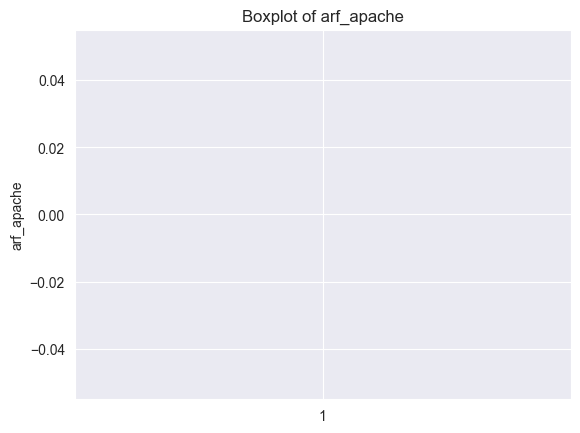

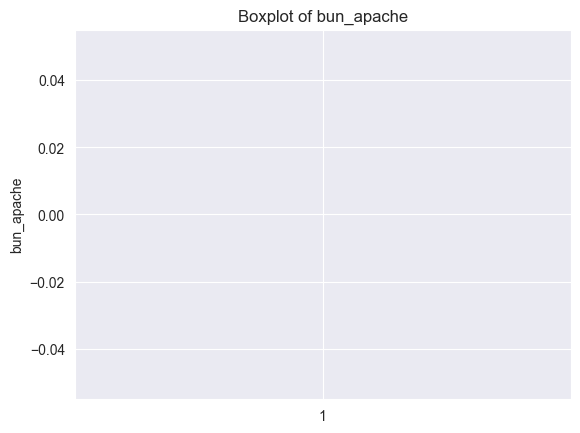

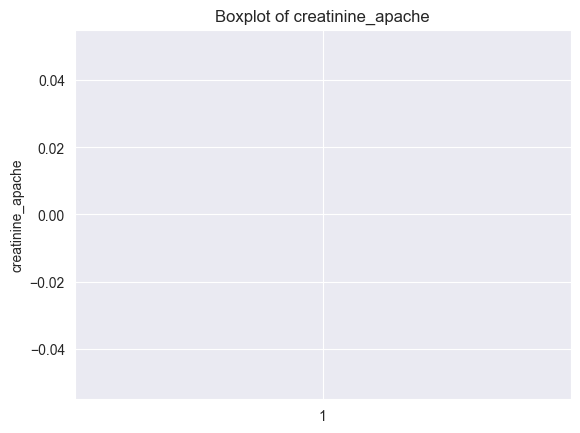

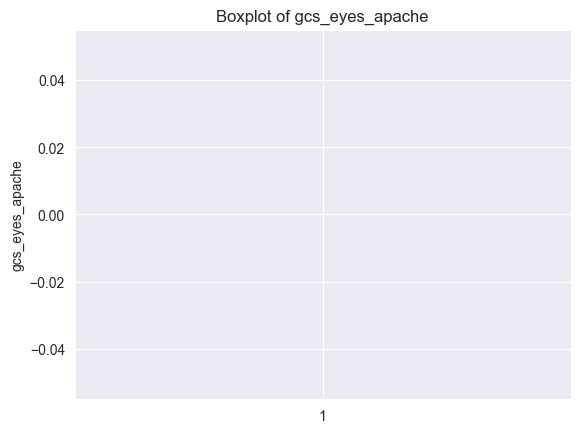

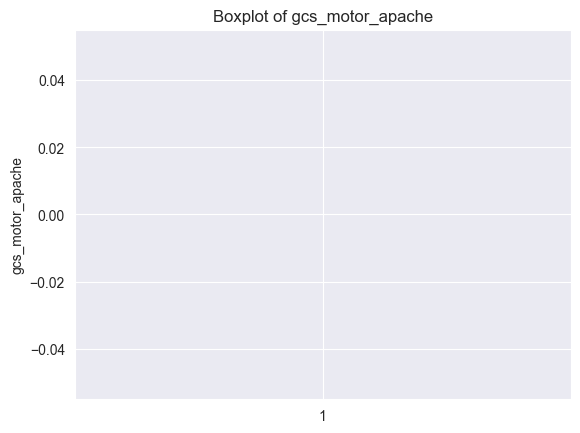

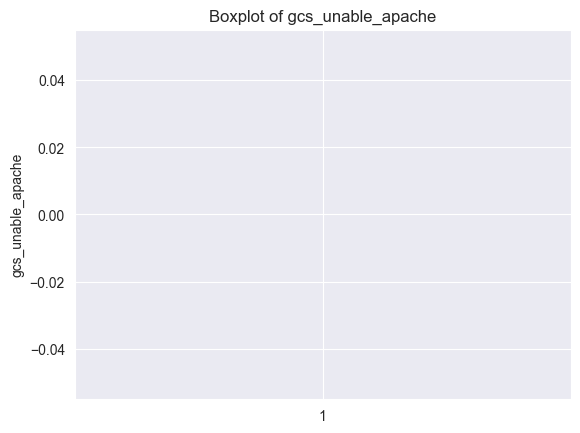

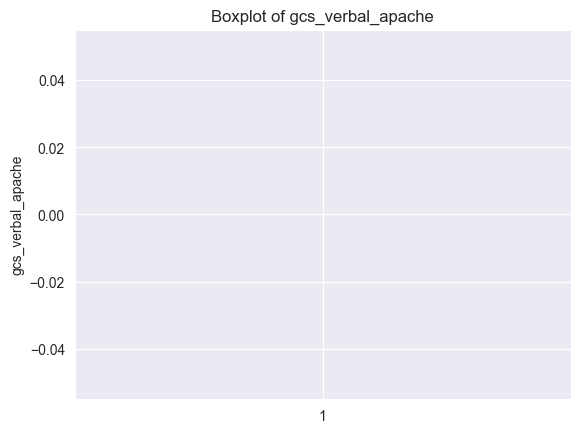

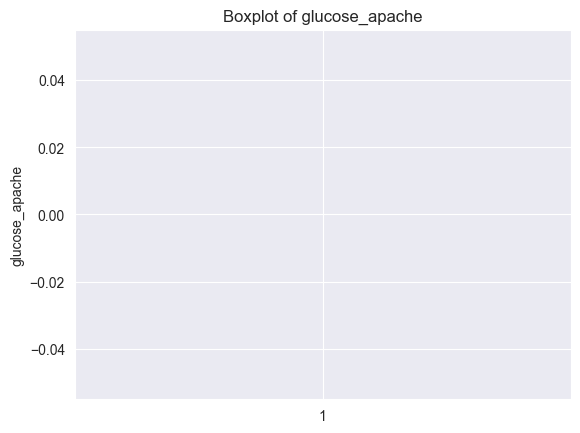

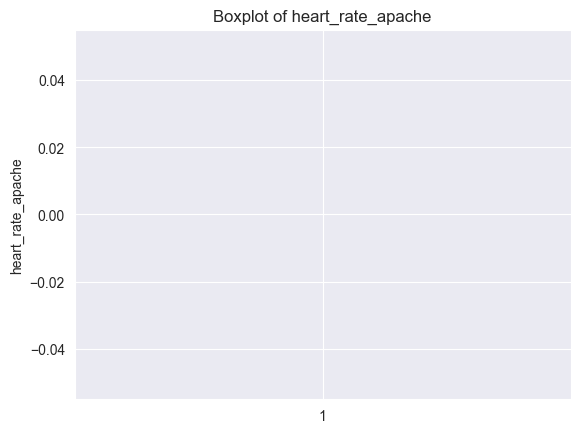

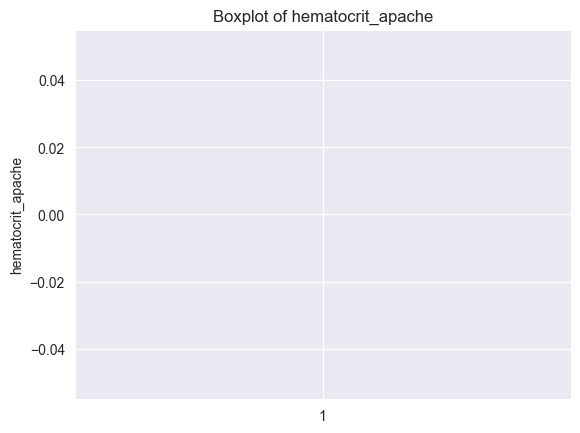

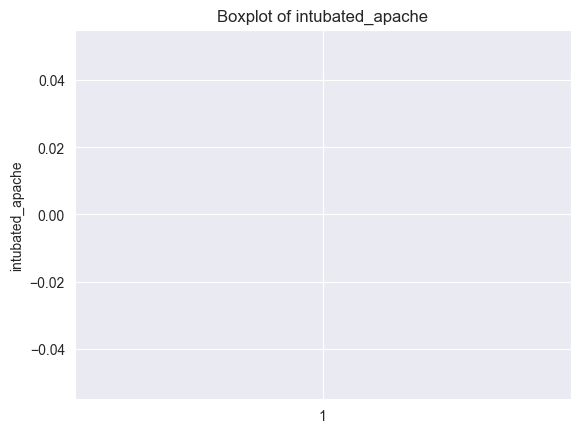

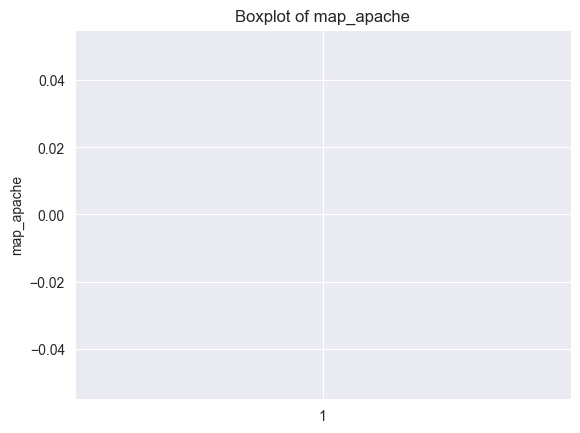

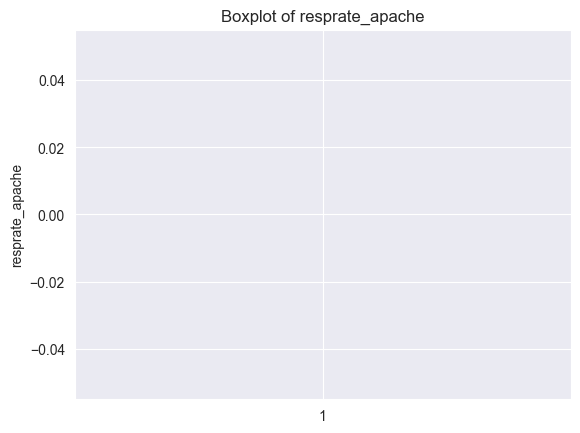

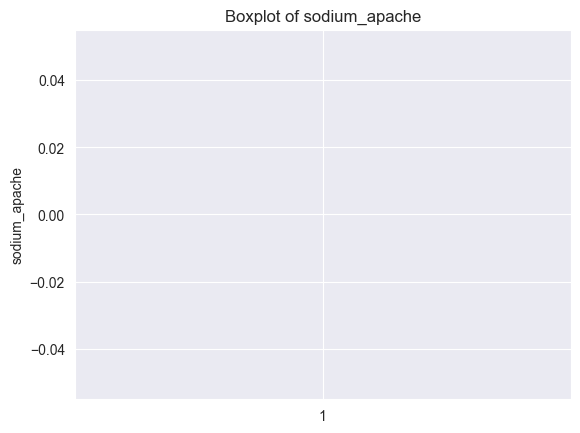

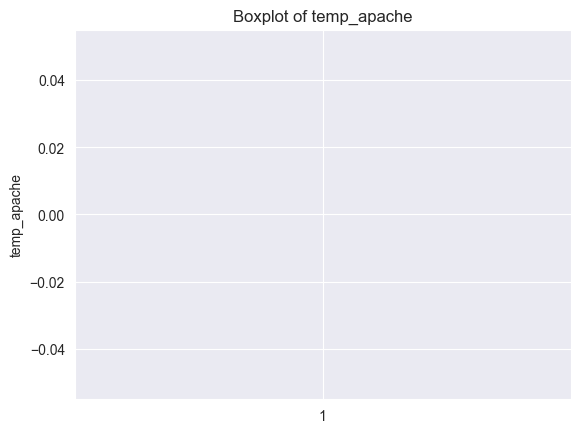

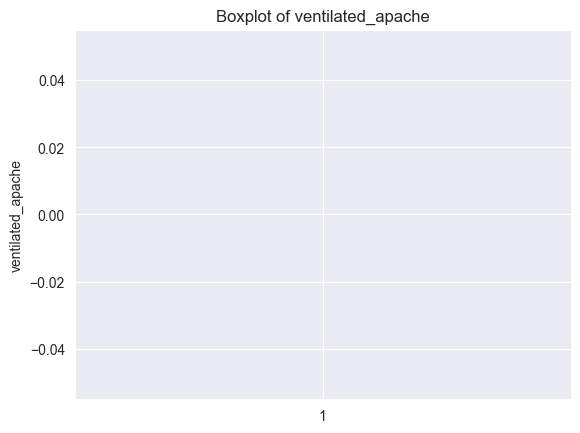

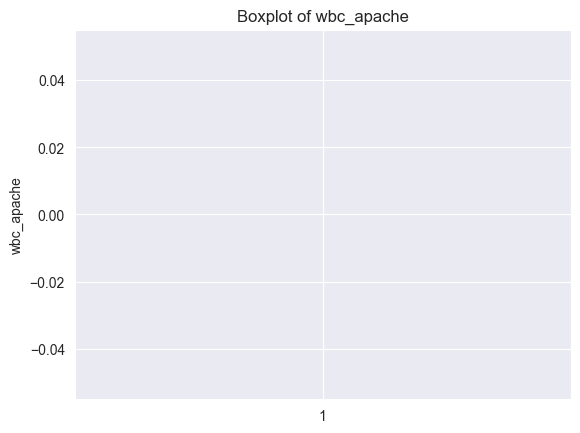

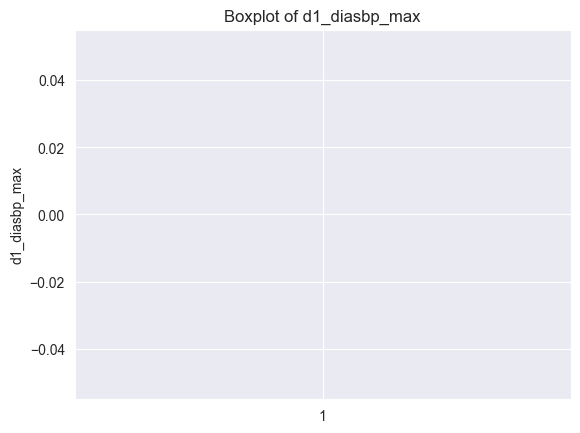

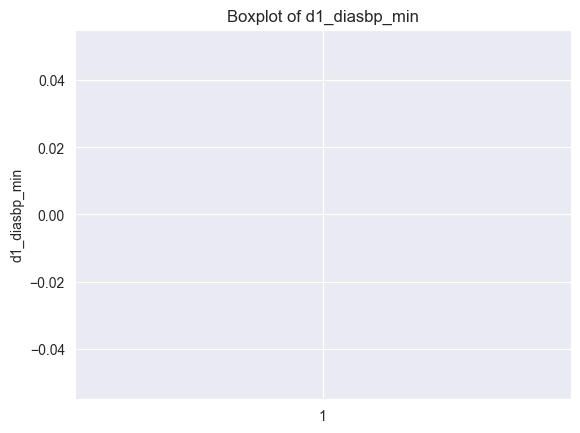

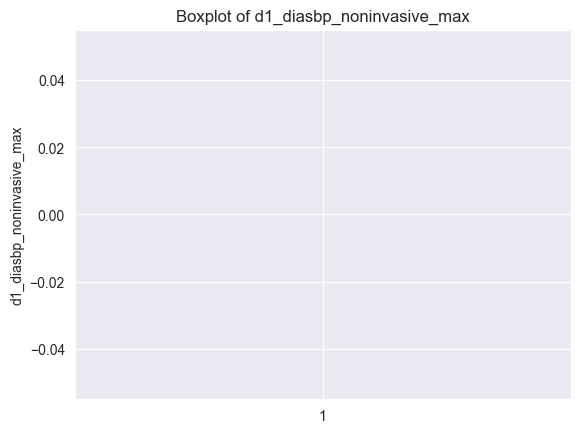

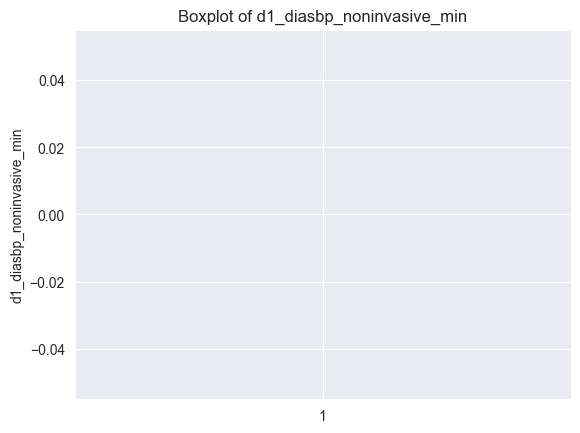

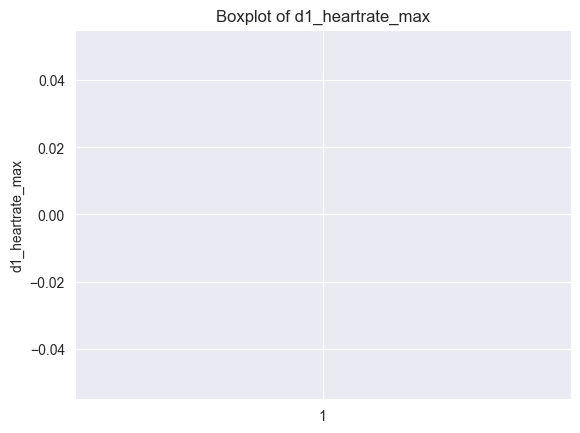

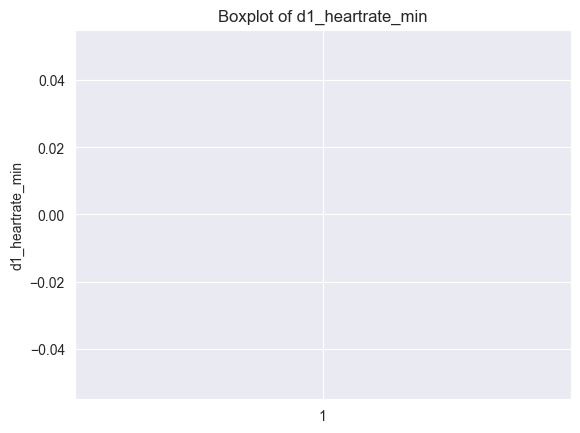

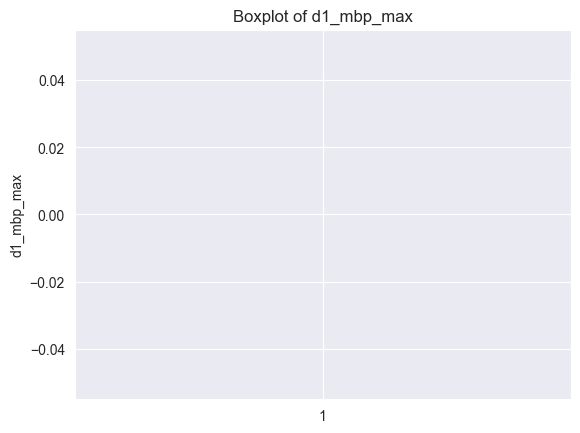

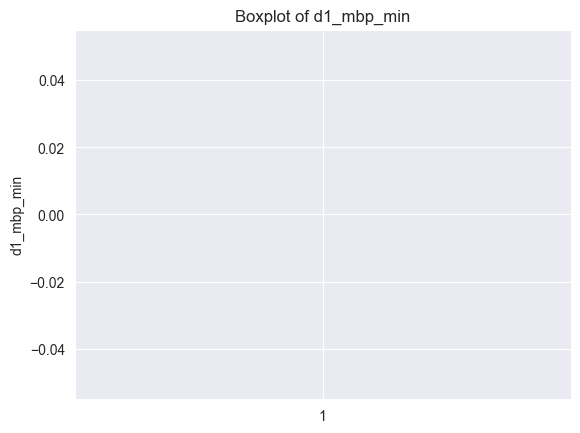

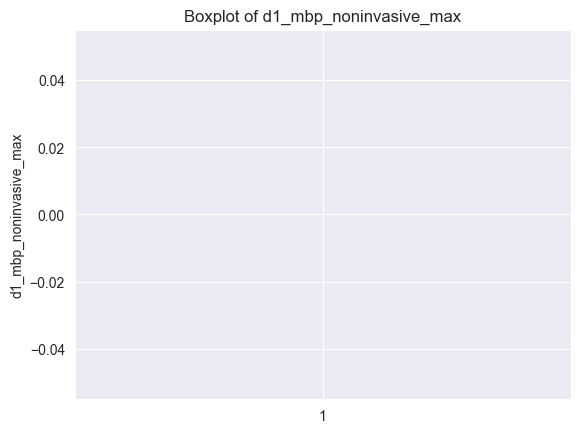

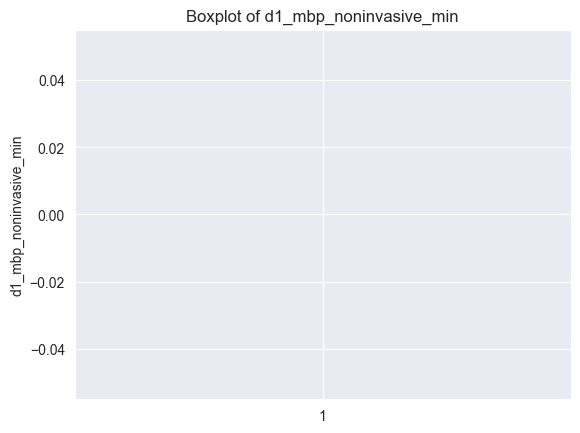

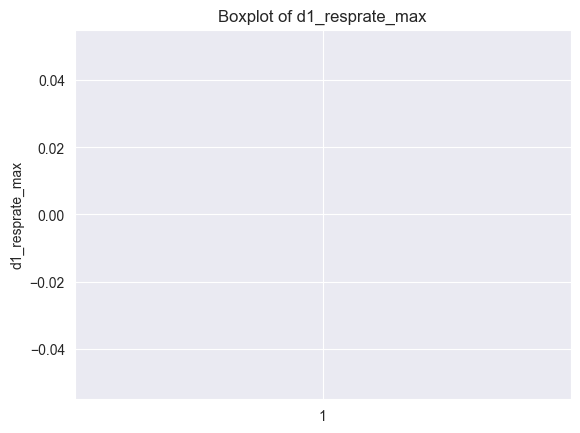

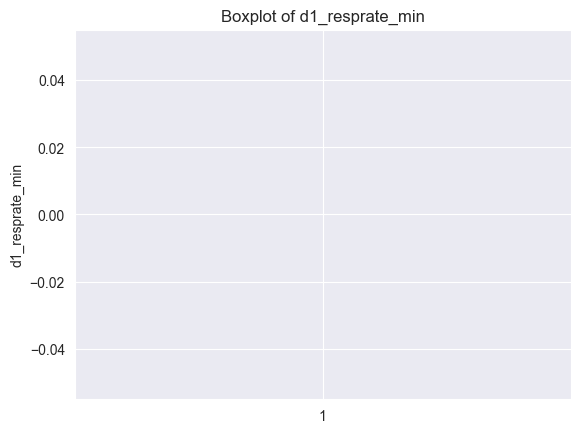

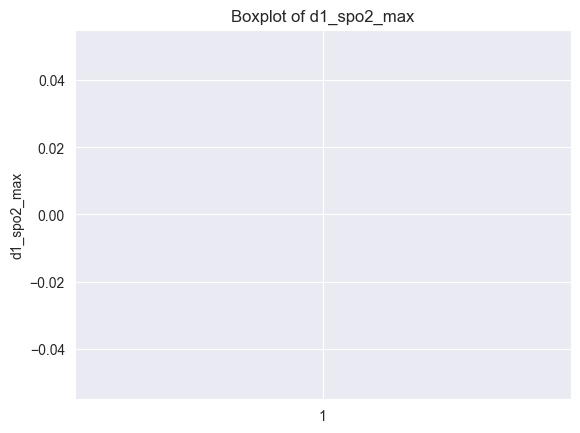

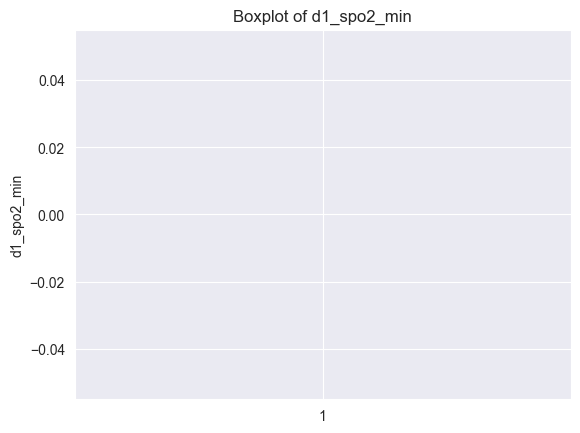

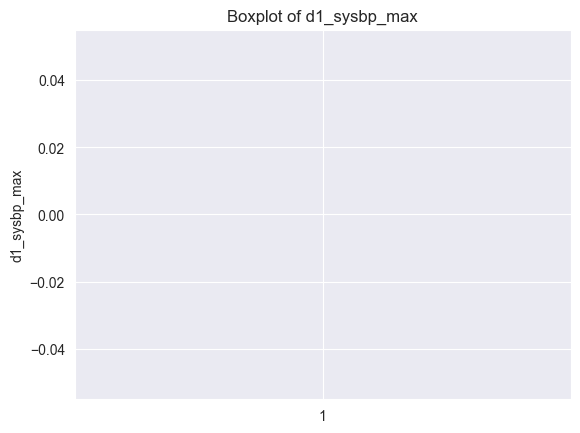

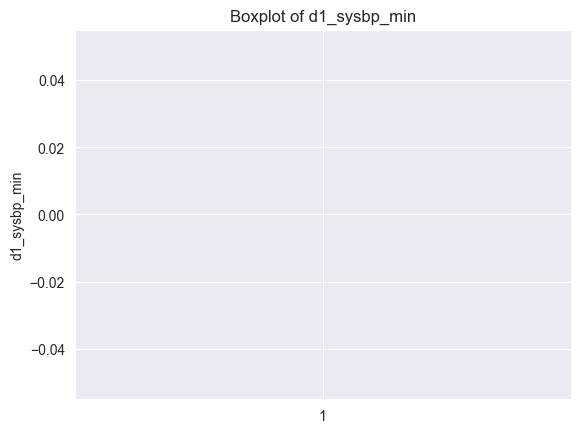

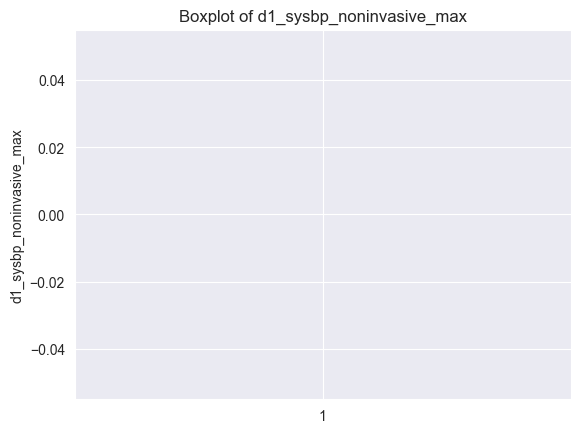

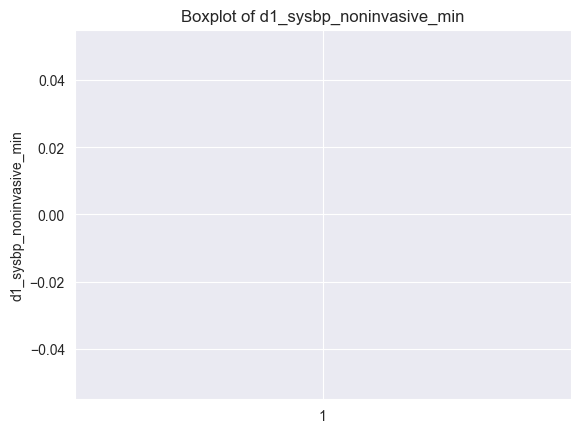

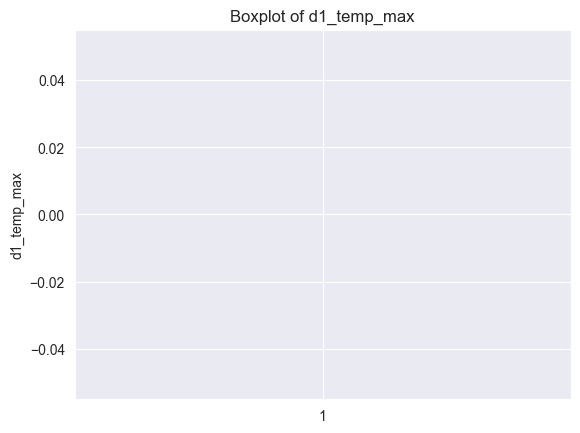

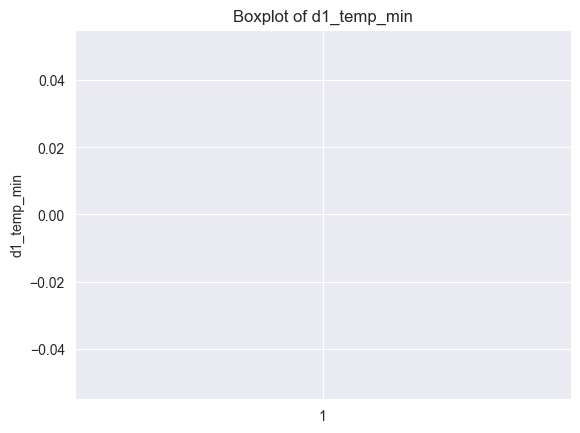

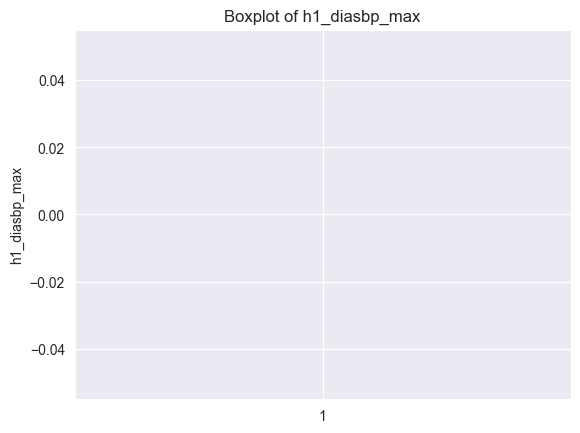

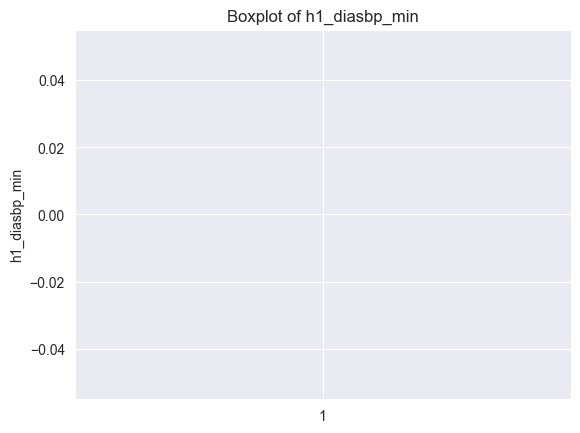

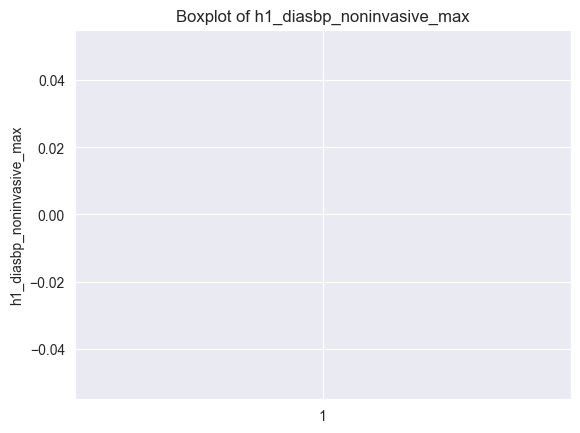

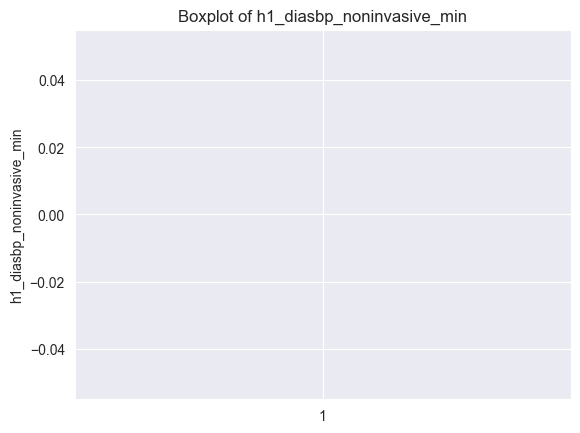

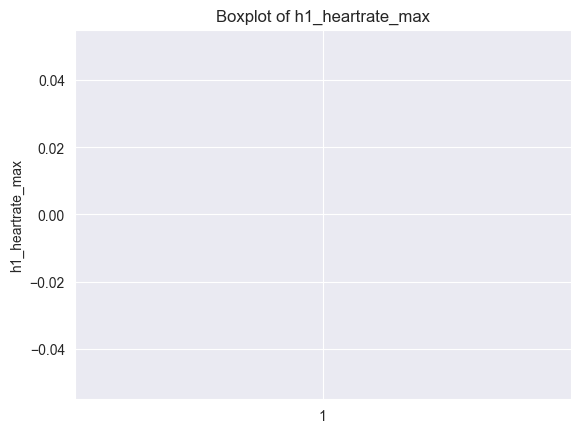

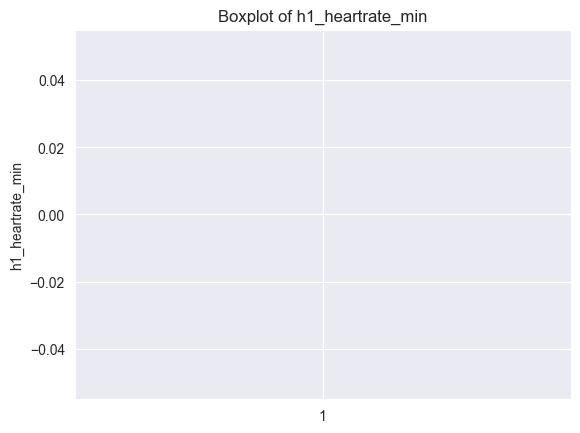

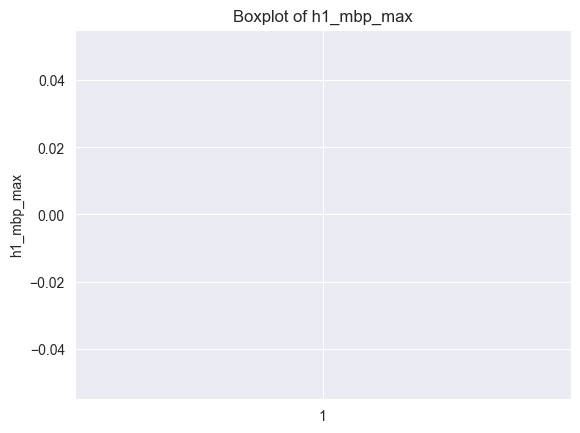

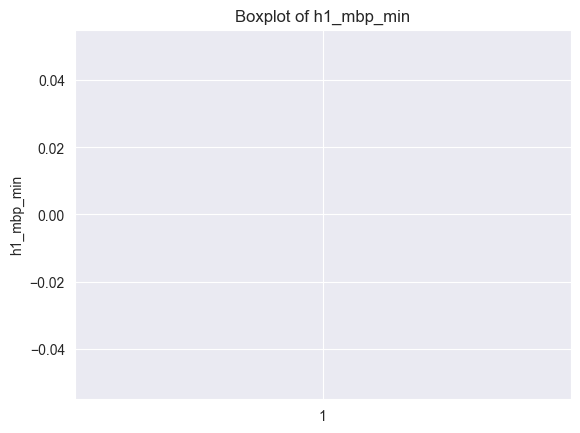

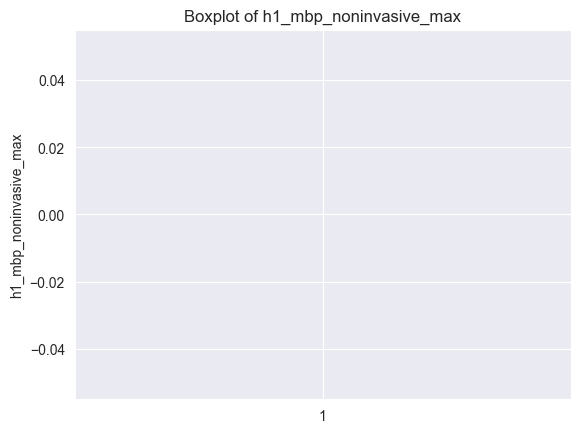

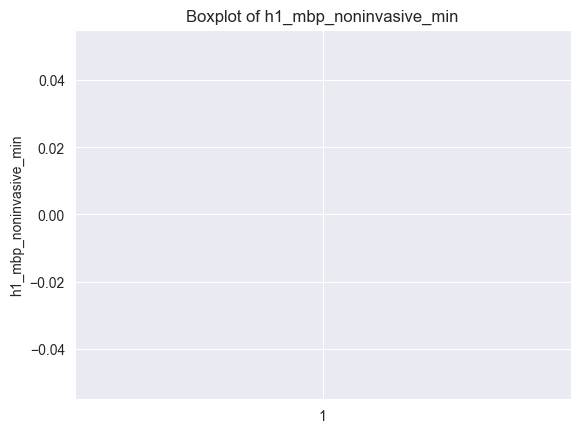

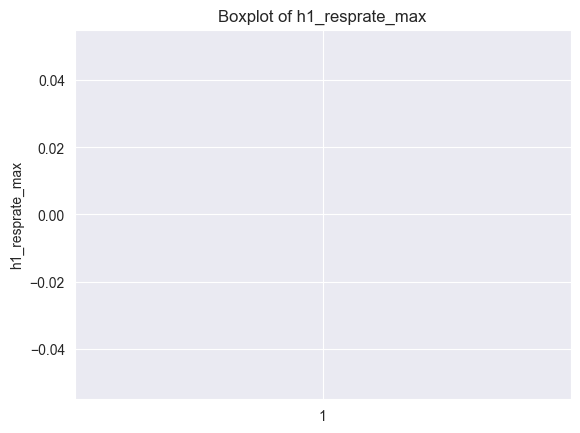

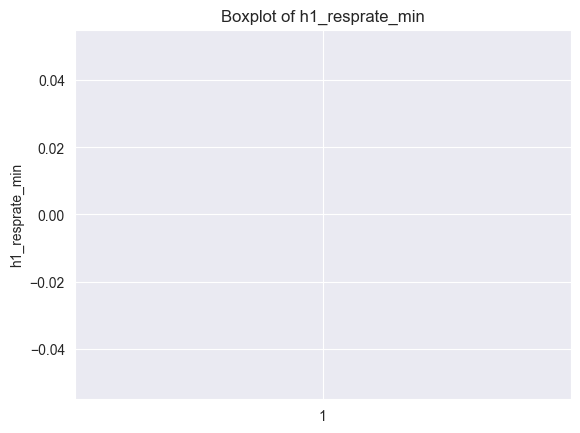

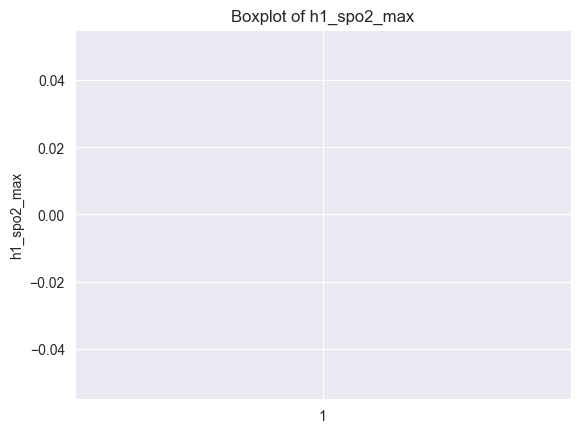

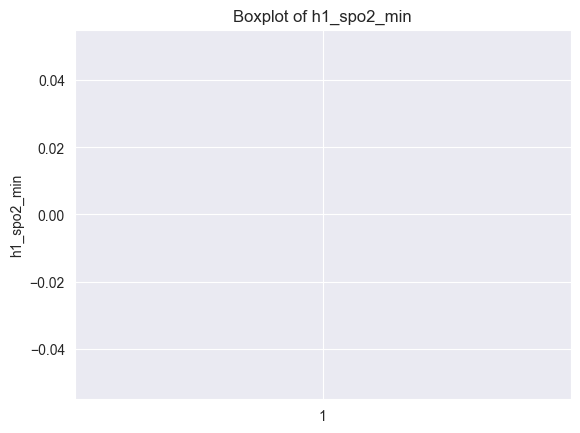

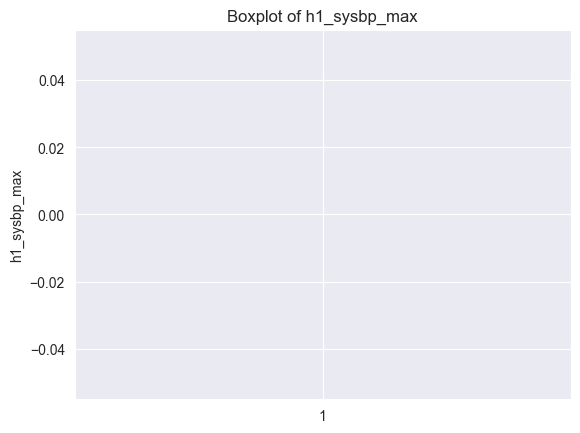

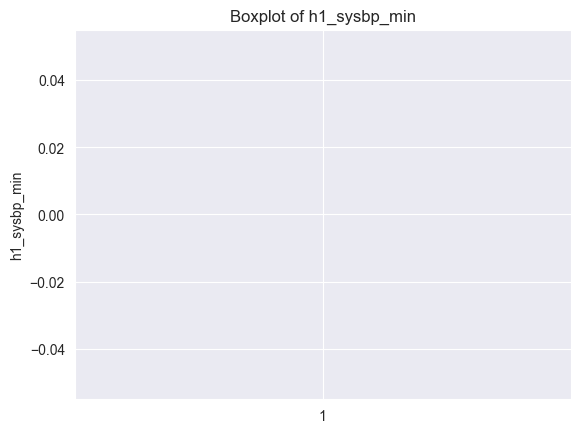

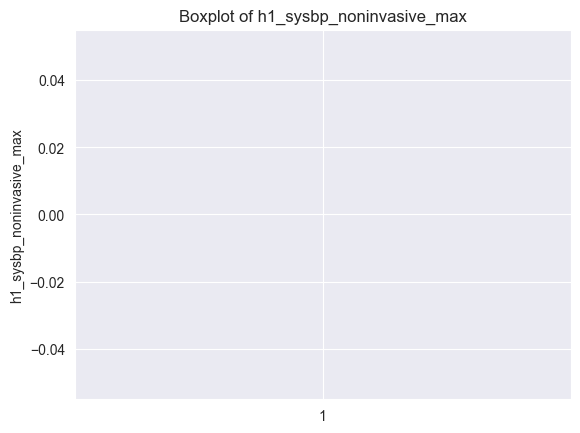

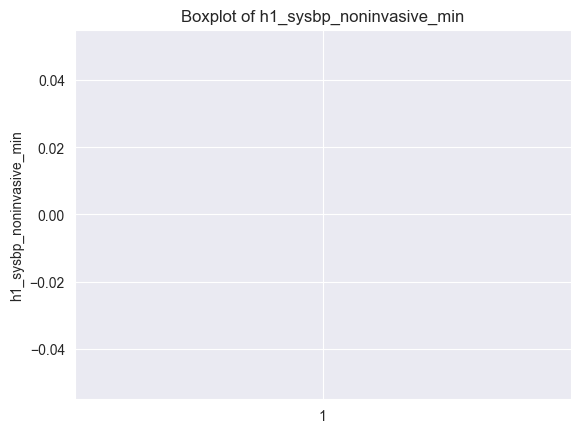

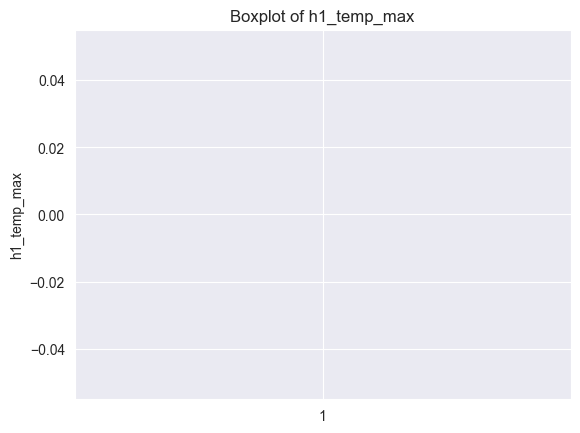

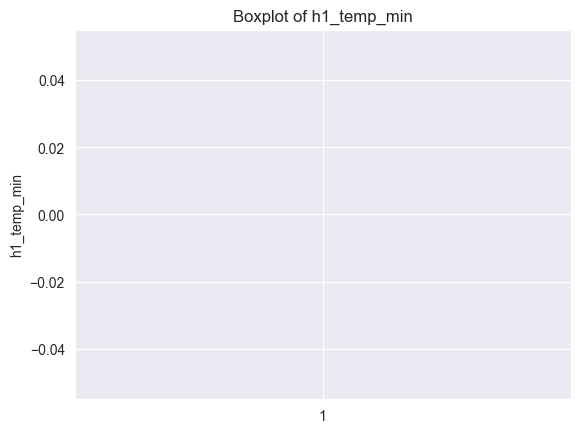

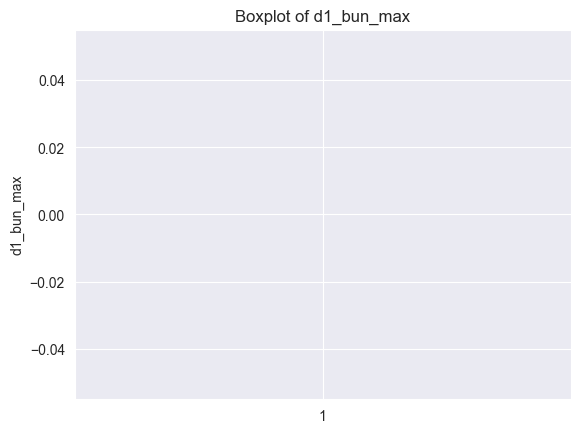

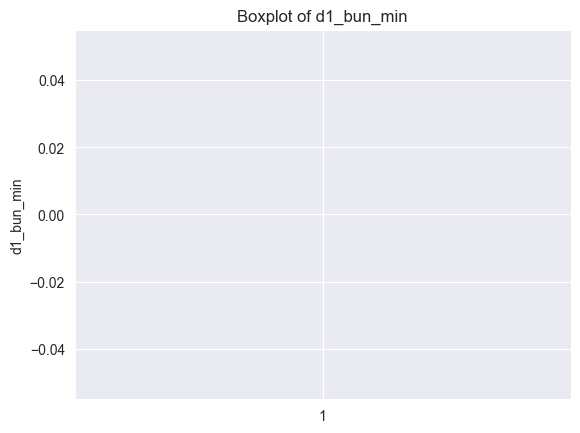

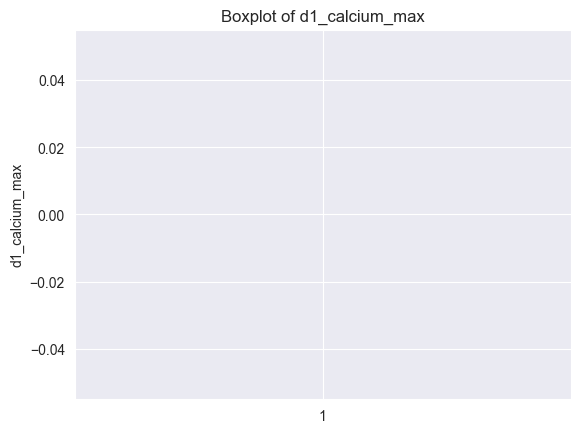

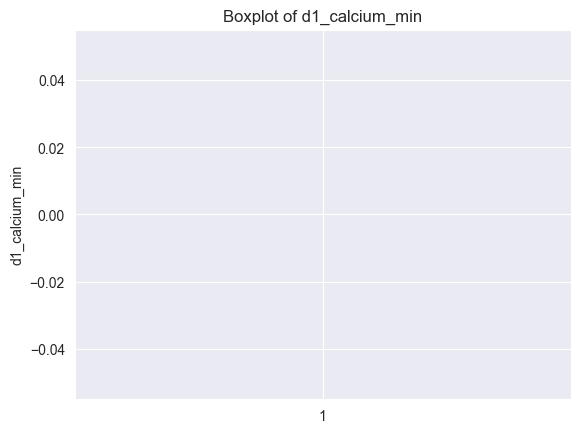

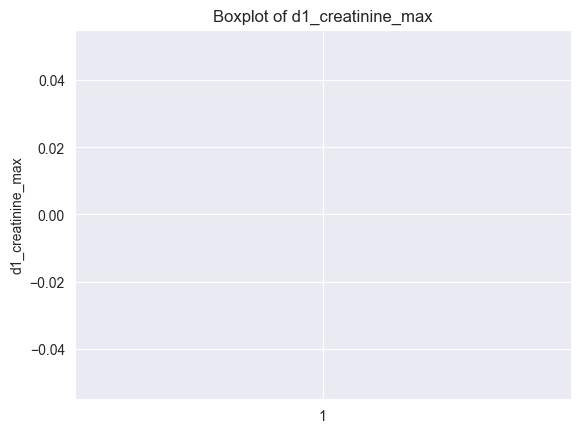

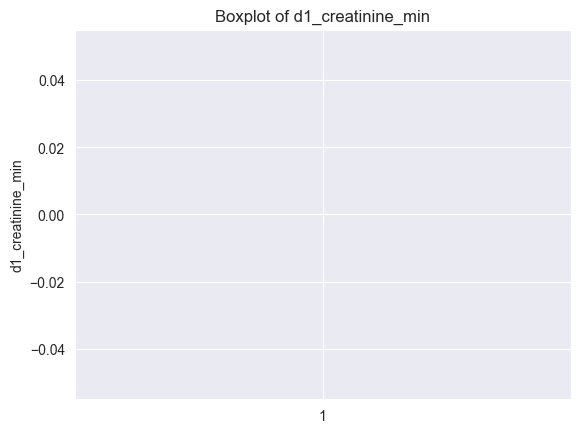

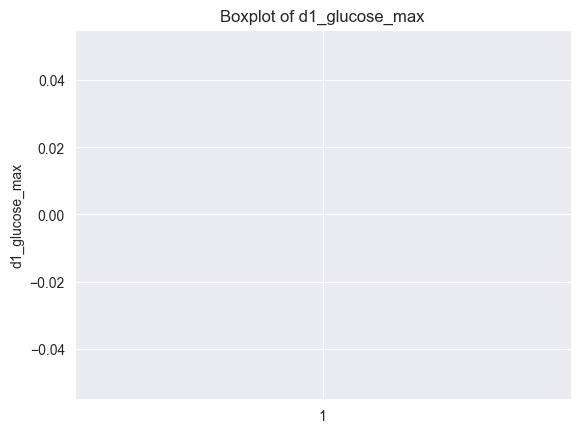

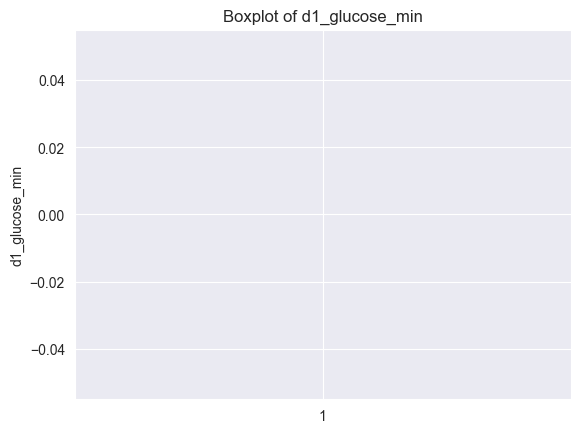

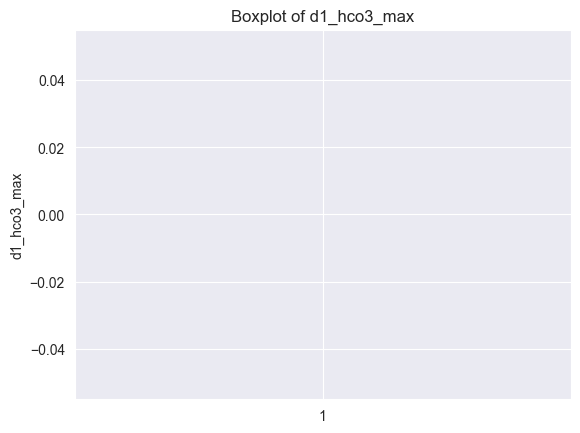

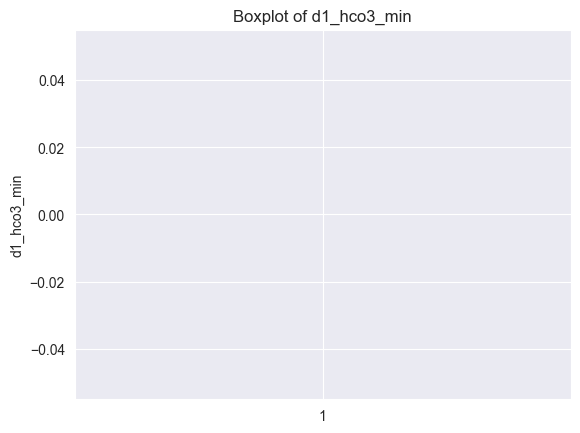

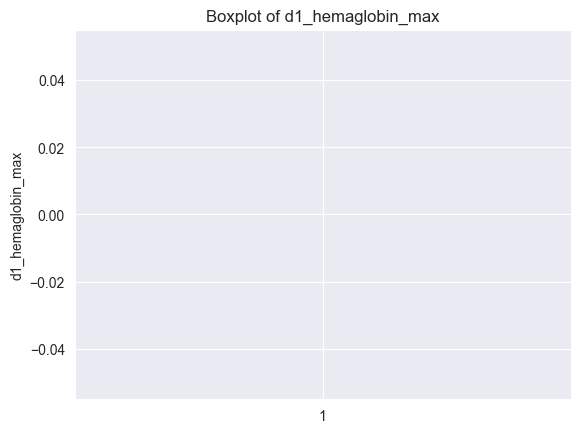

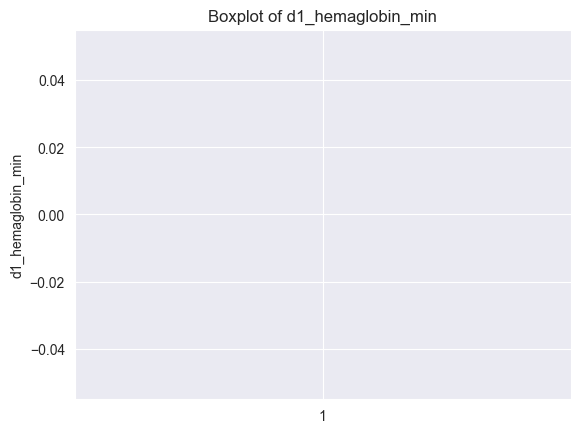

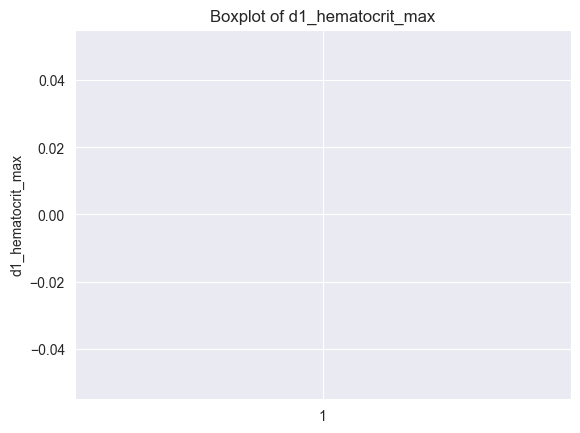

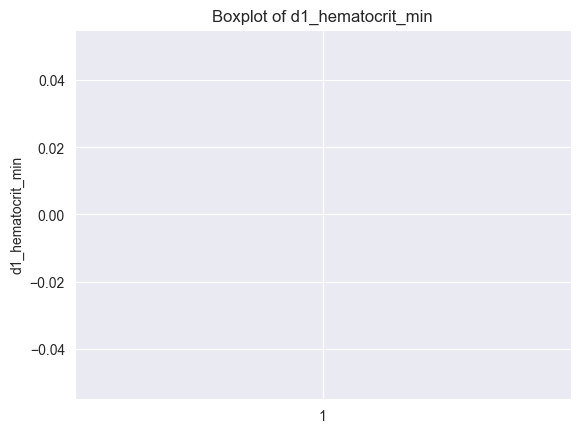

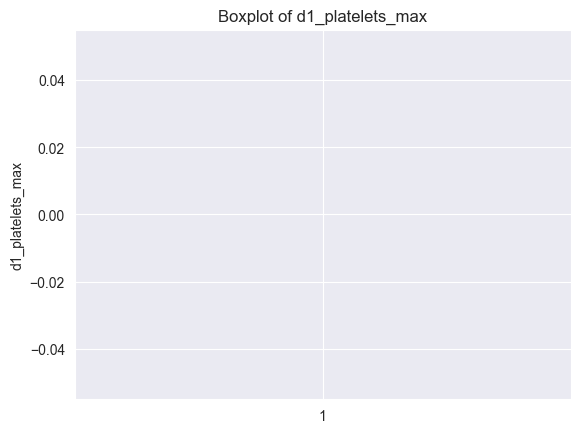

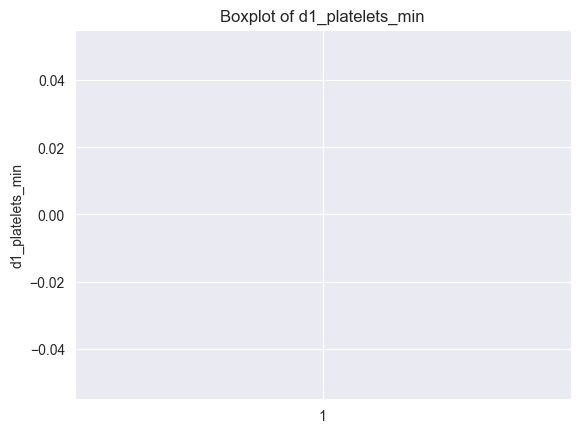

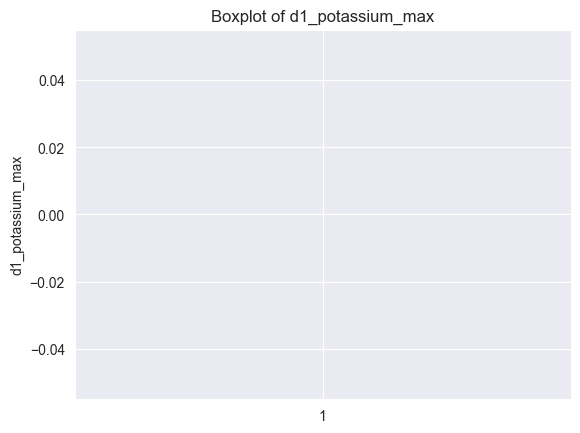

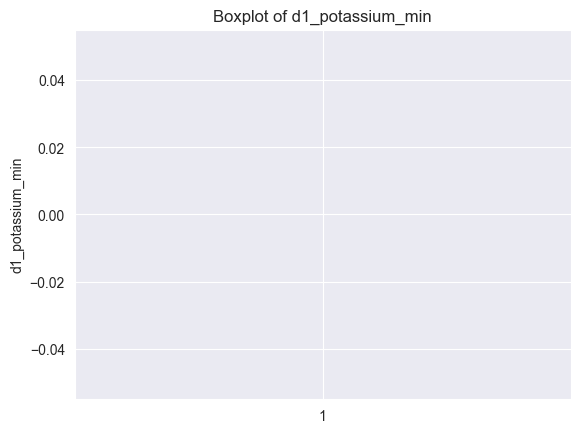

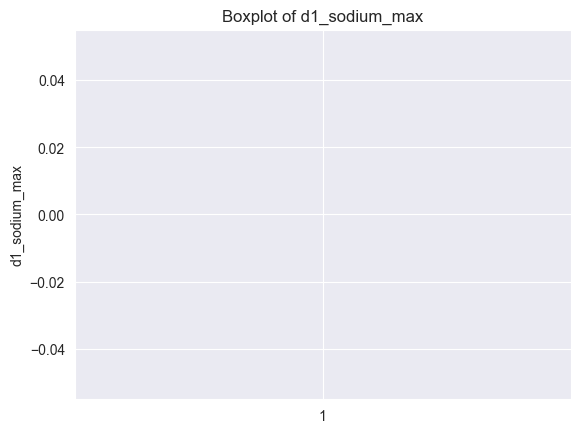

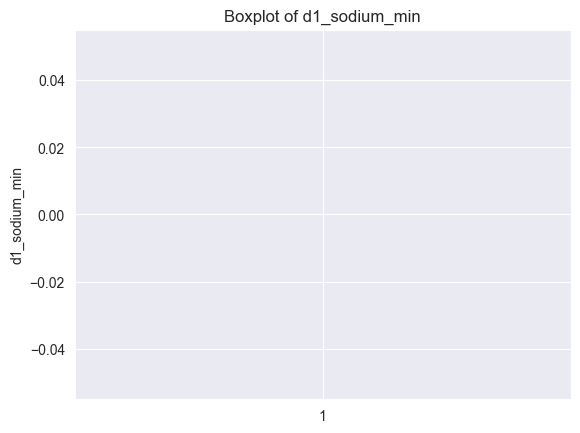

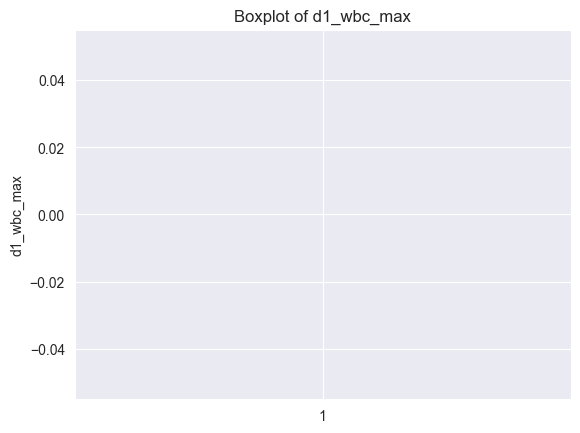

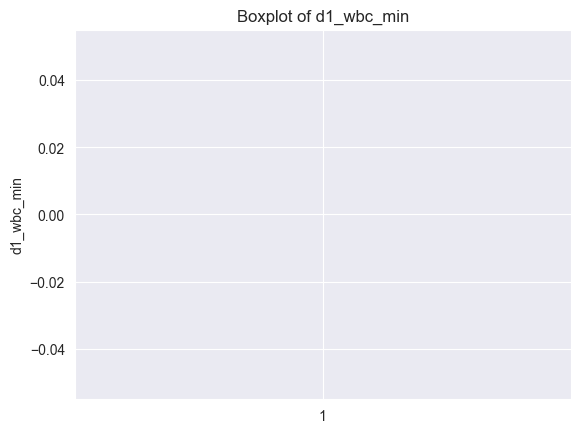

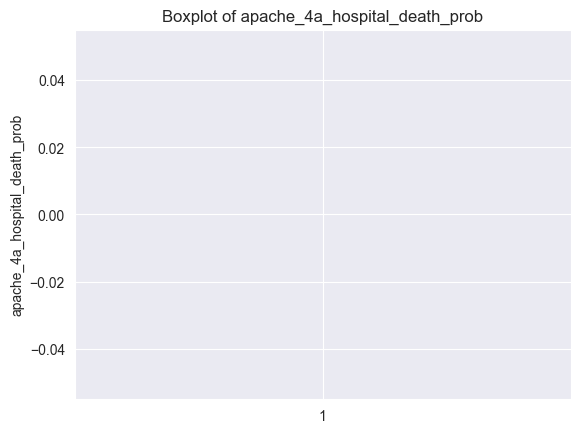

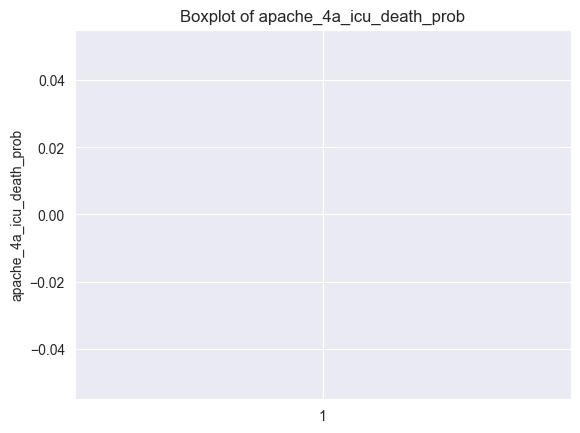

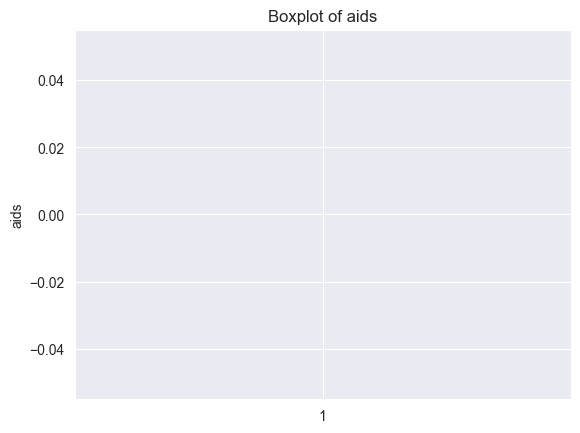

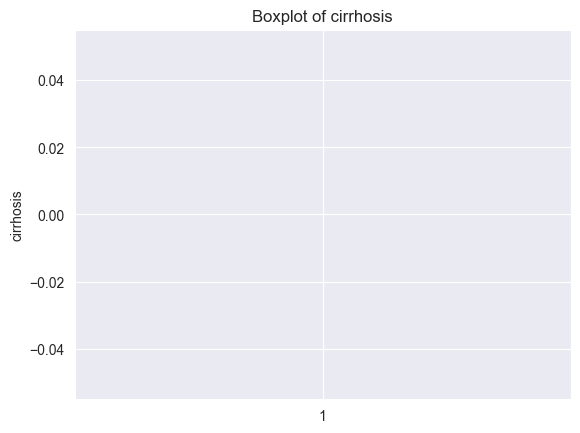

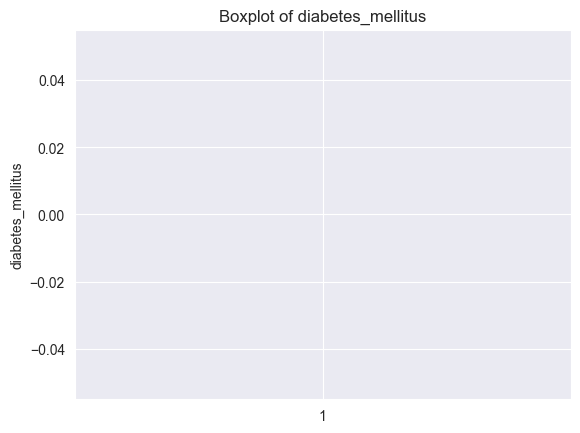

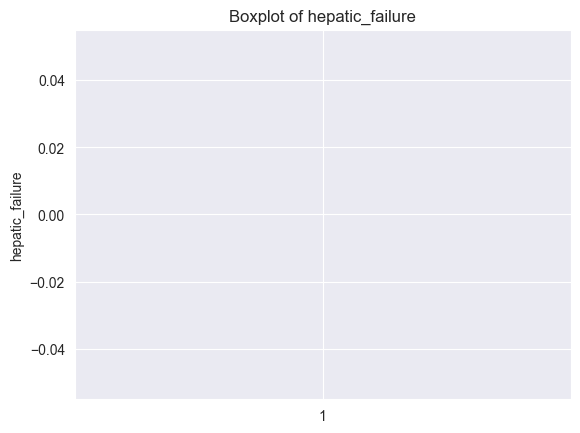

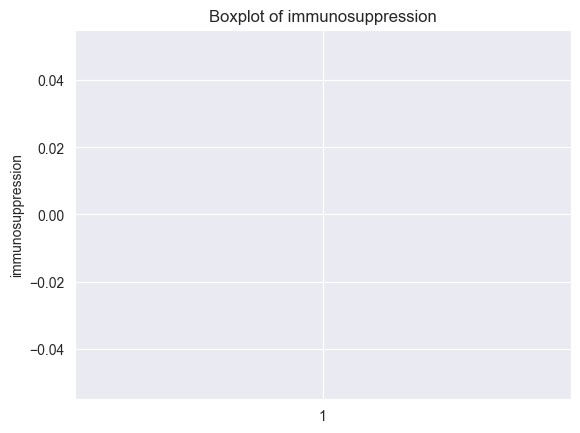

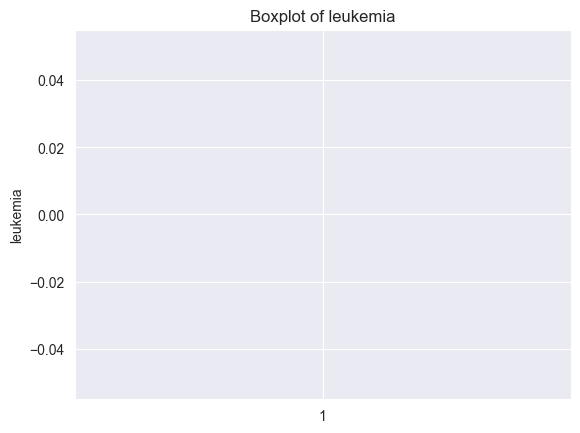

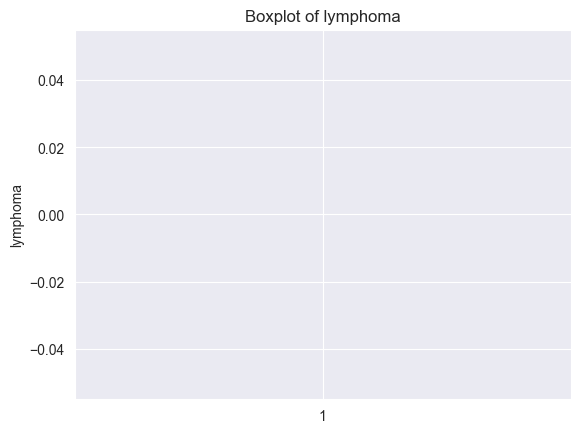

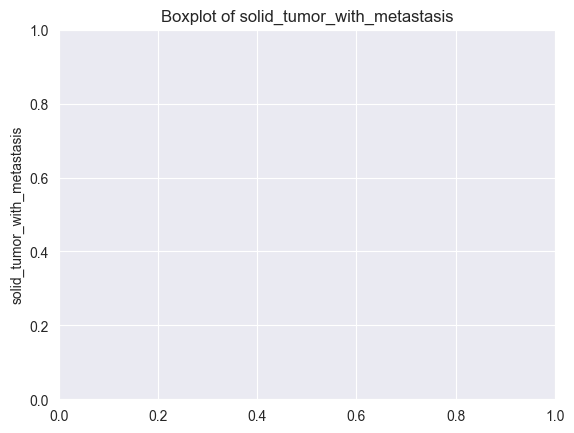

In [19]:
def check_outlier(cols):
    plt.boxplot(df_dropped[cols])
    plt.show()
    plt.ylabel(cols)
    plt.title(f"Boxplot of {cols}")

for cols in df_dropped.columns:
    if df_dropped[cols].dtype == 'int64' or df_dropped[cols].dtype == 'float64':
        check_outlier(cols)

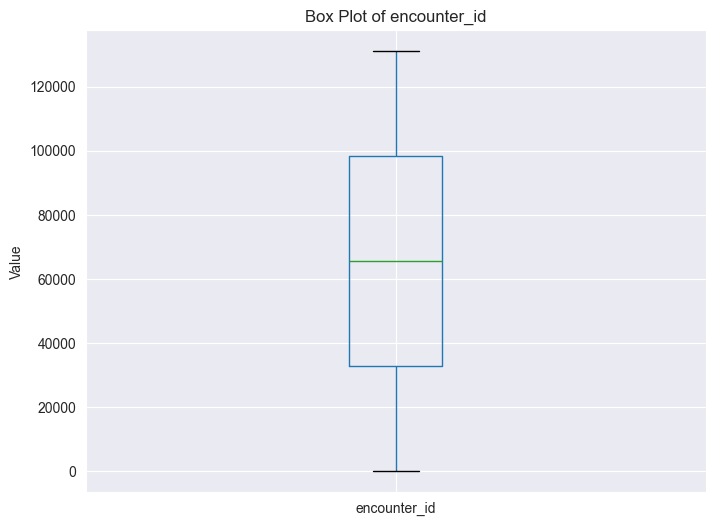

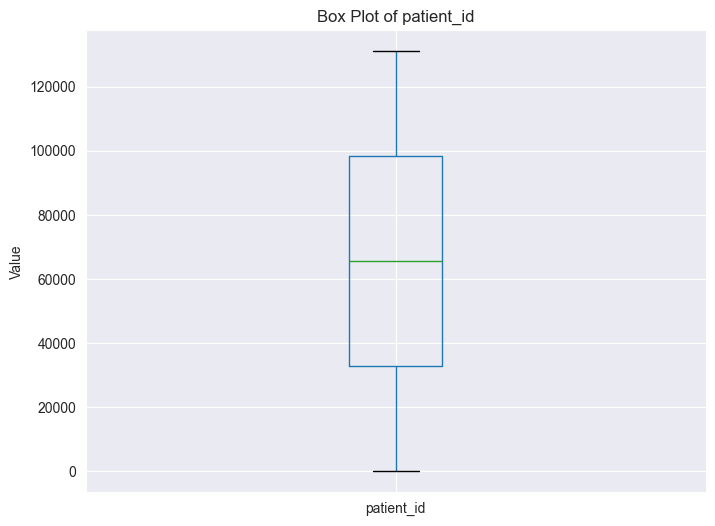

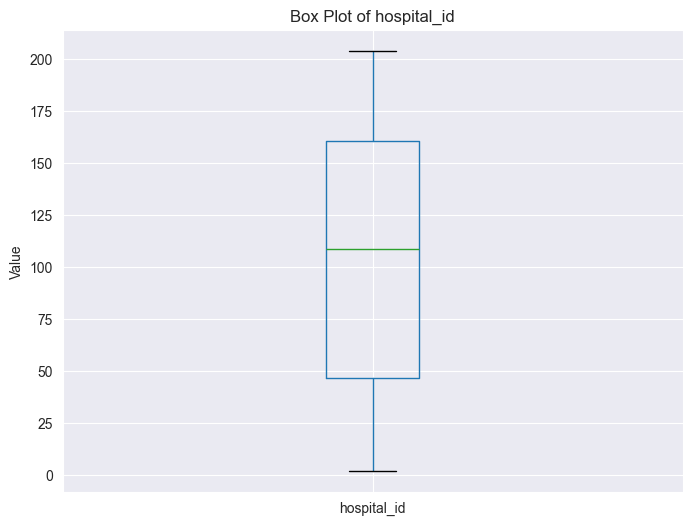

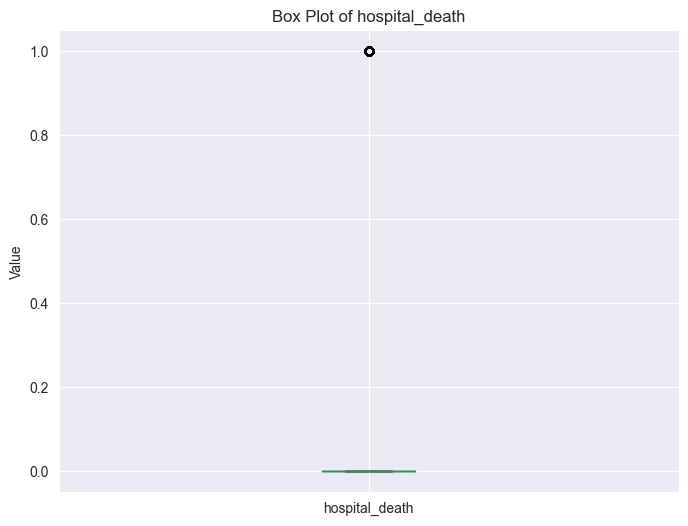

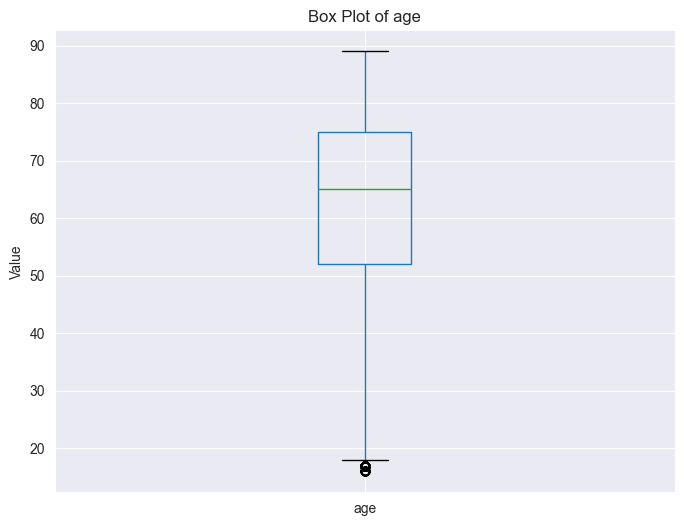

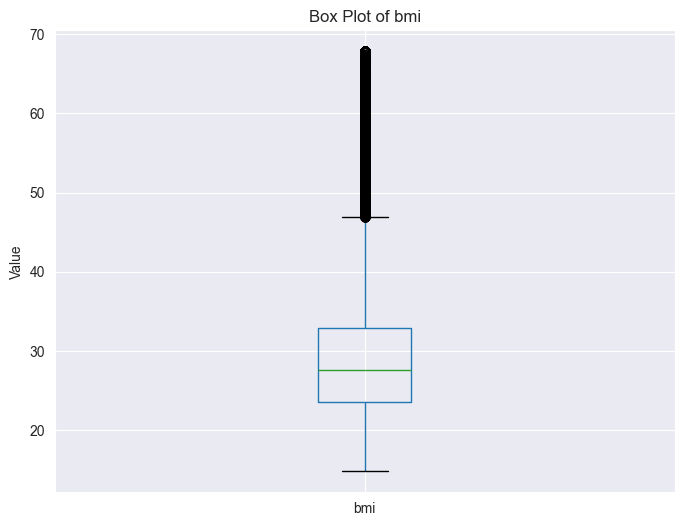

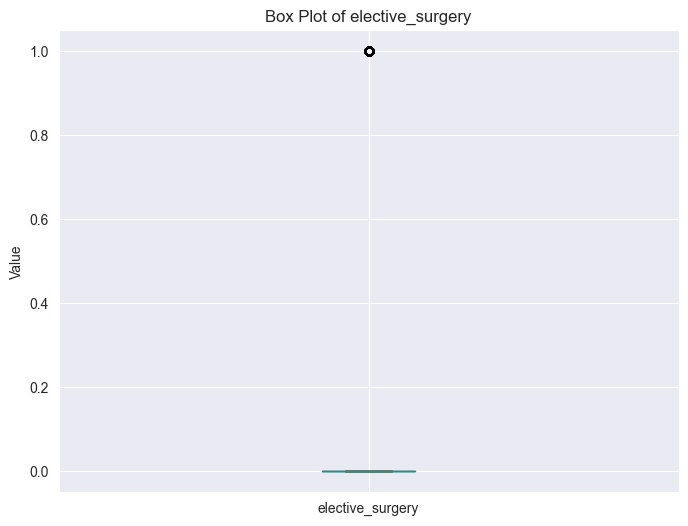

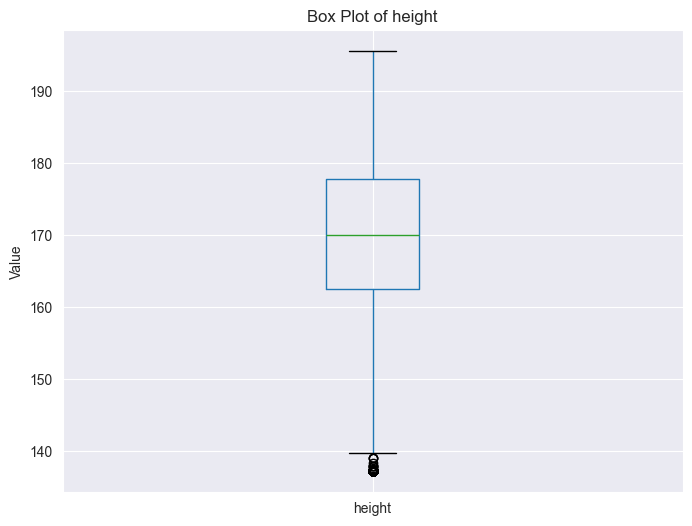

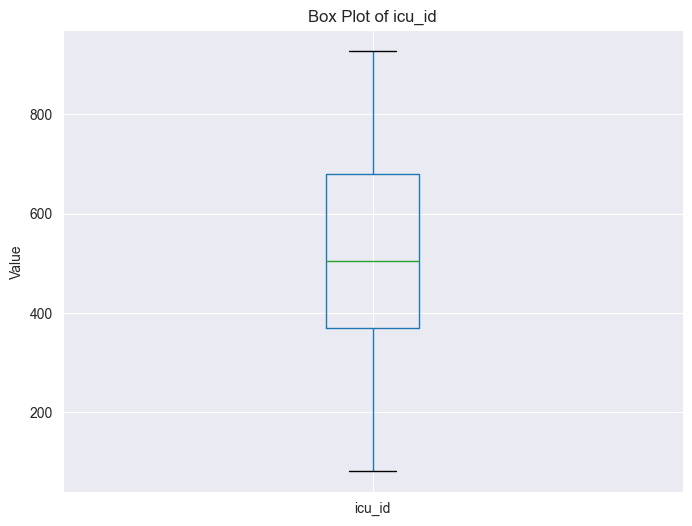

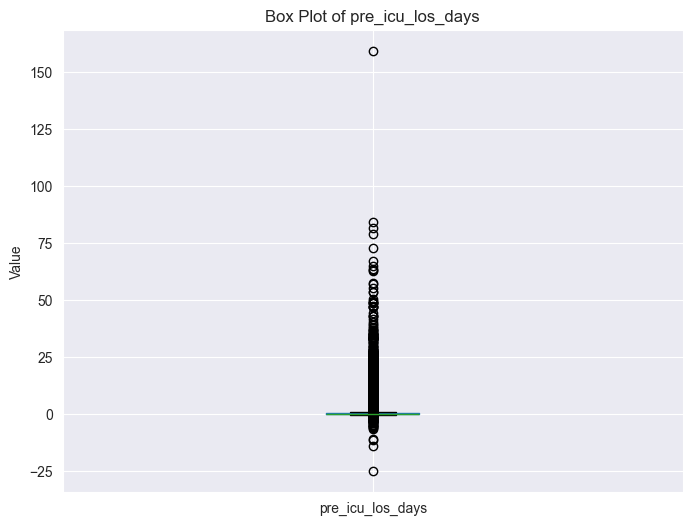

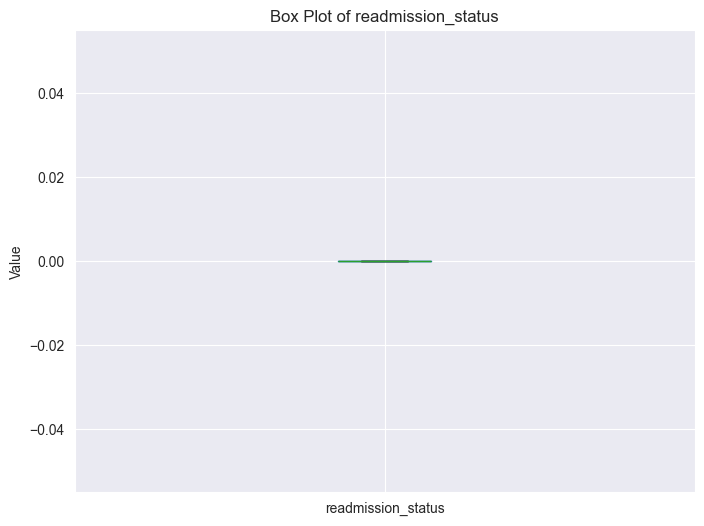

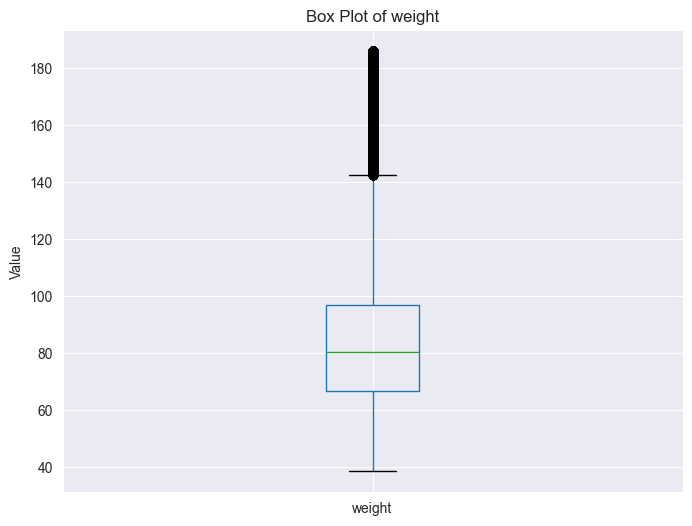

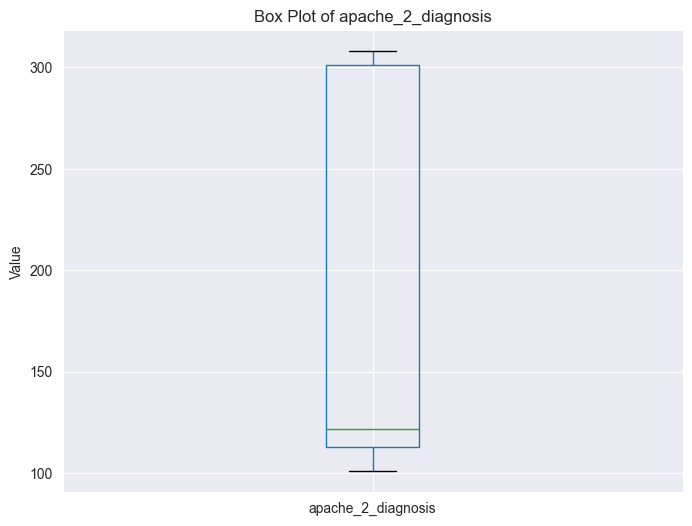

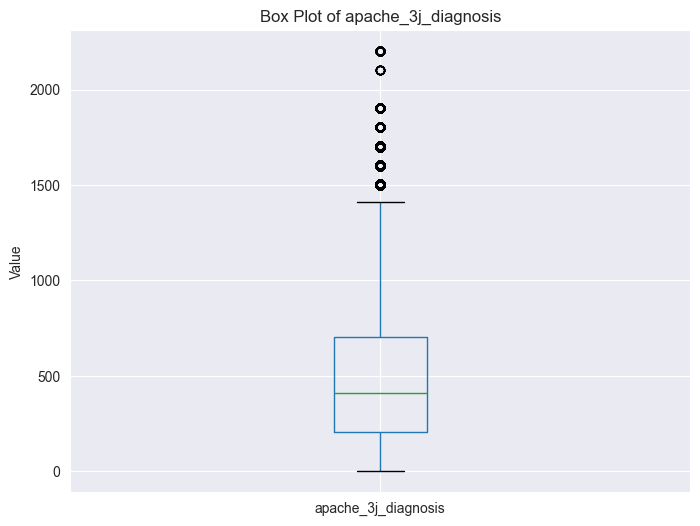

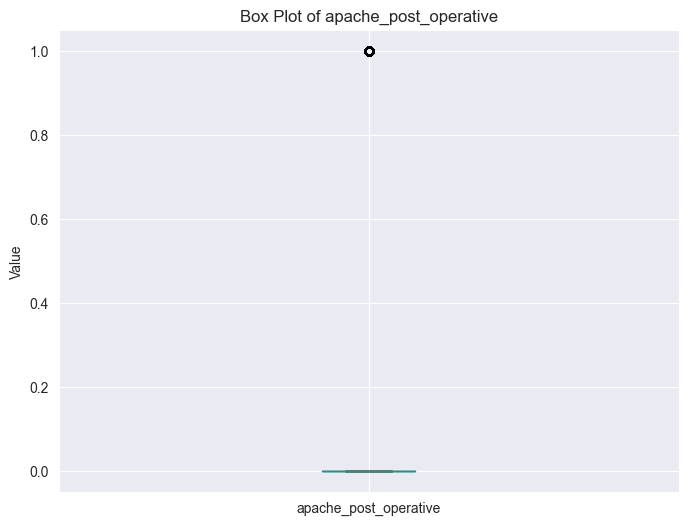

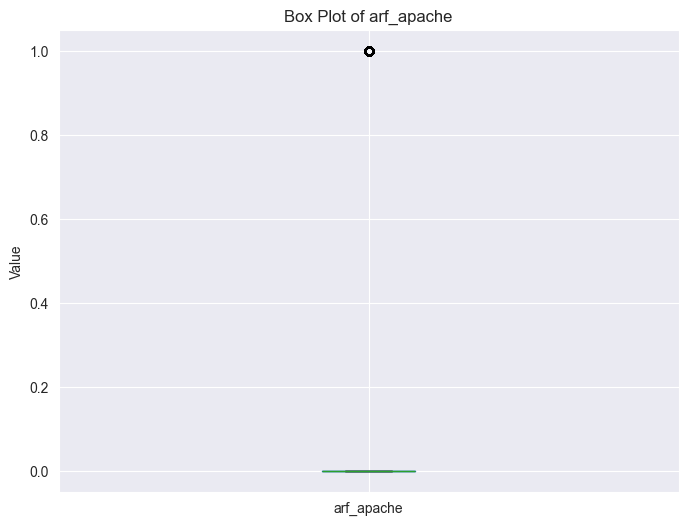

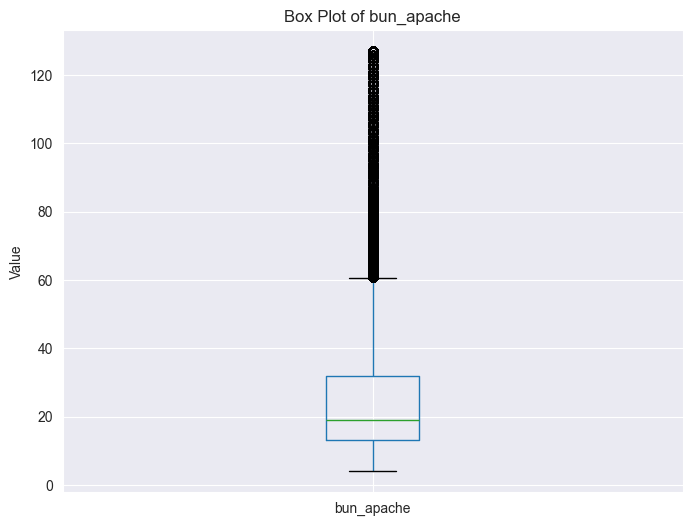

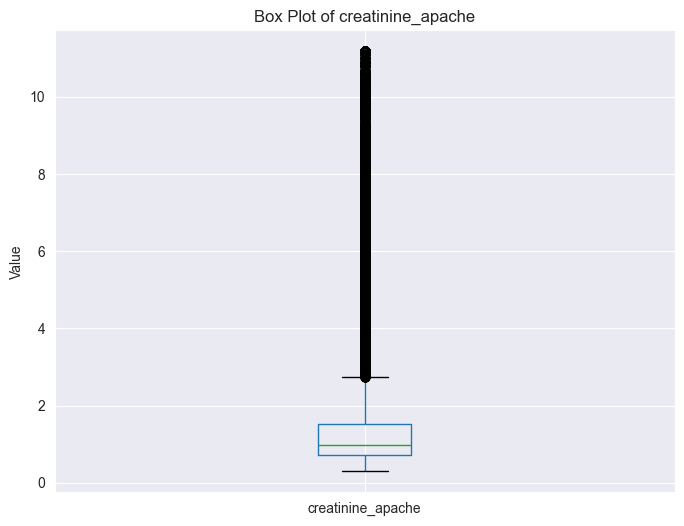

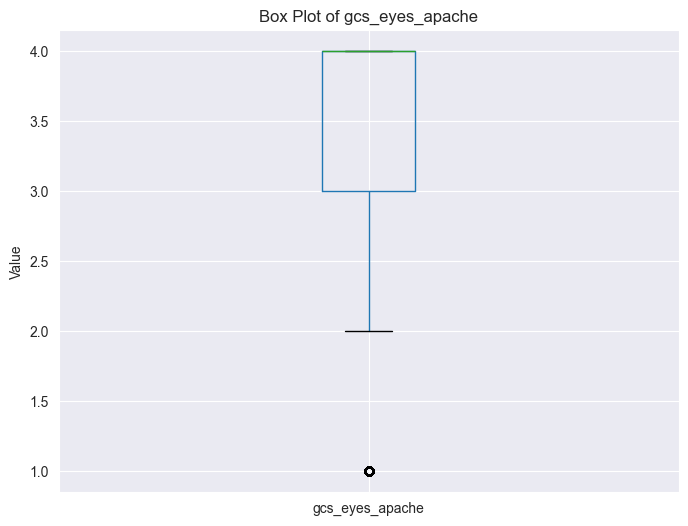

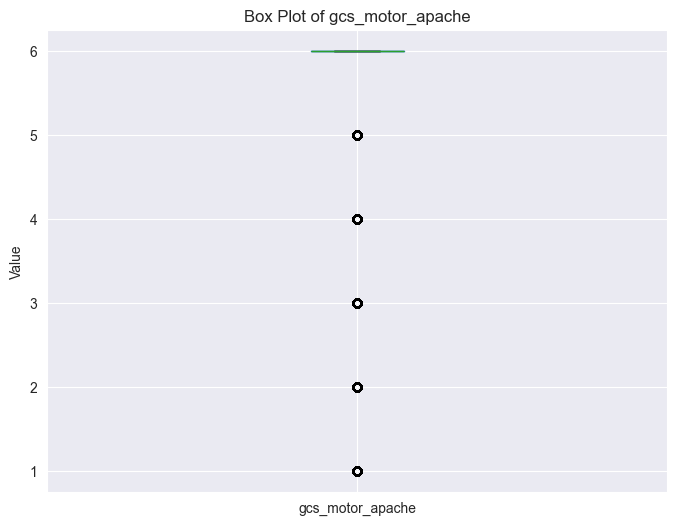

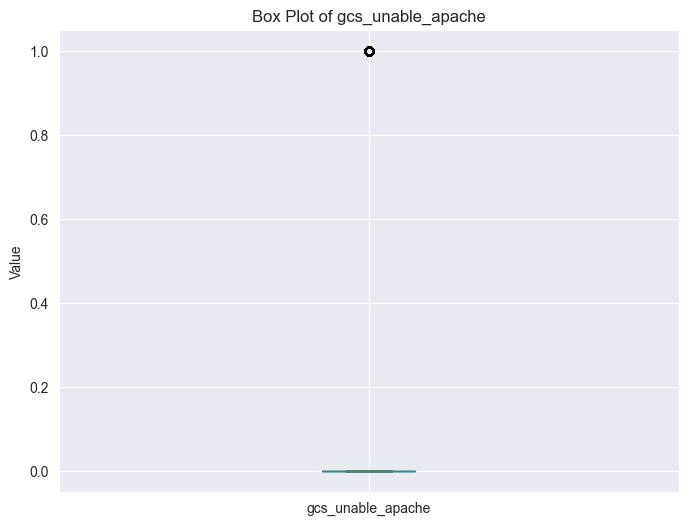

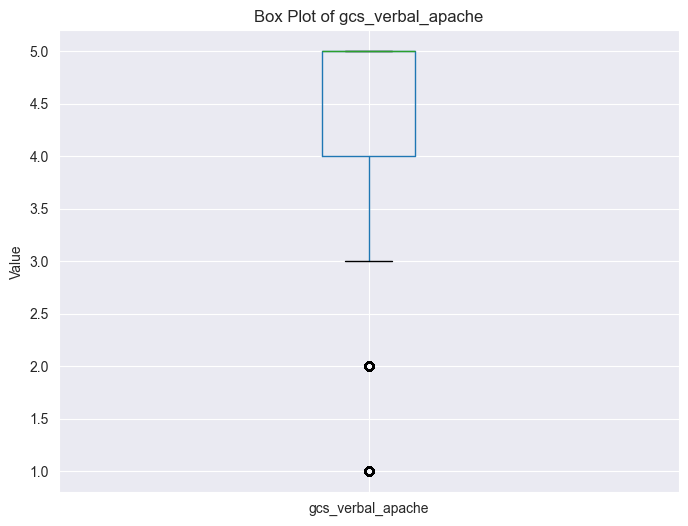

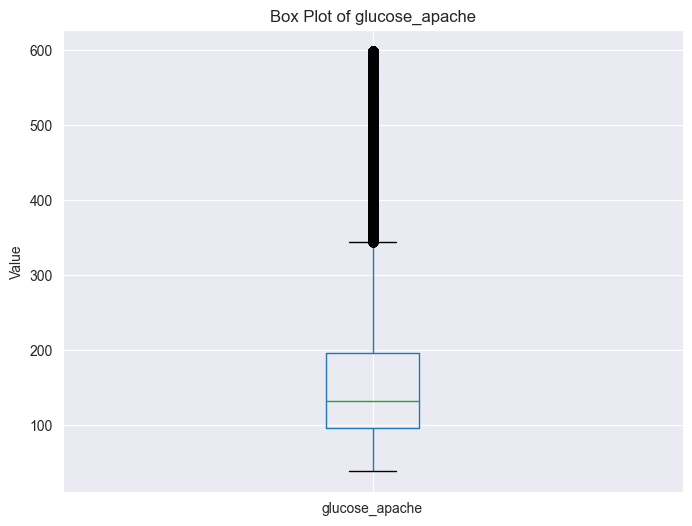

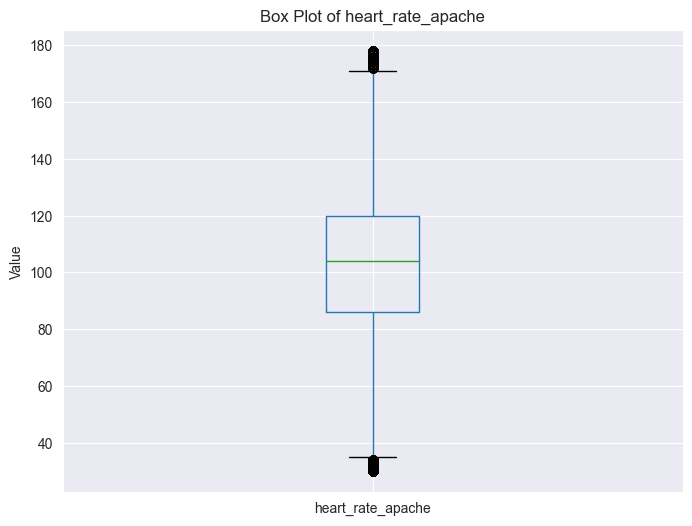

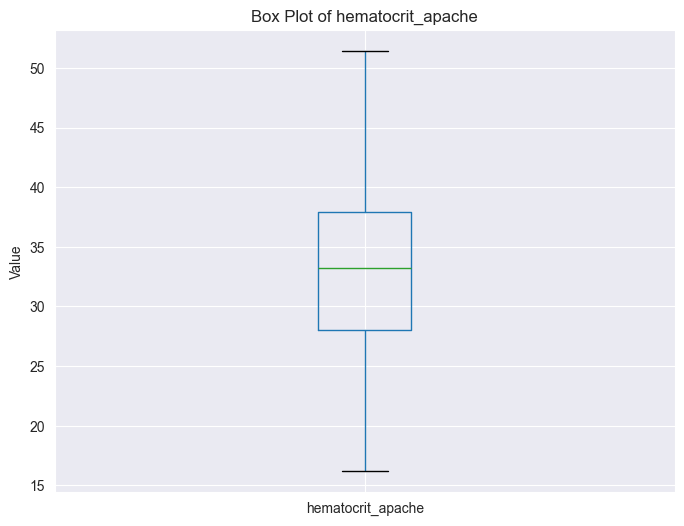

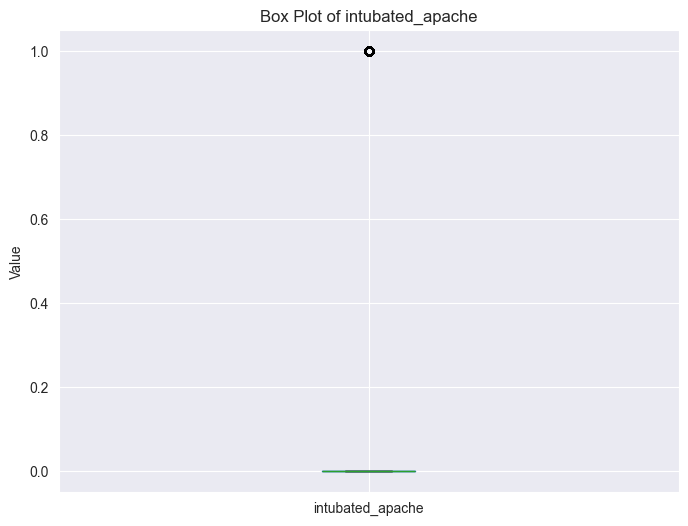

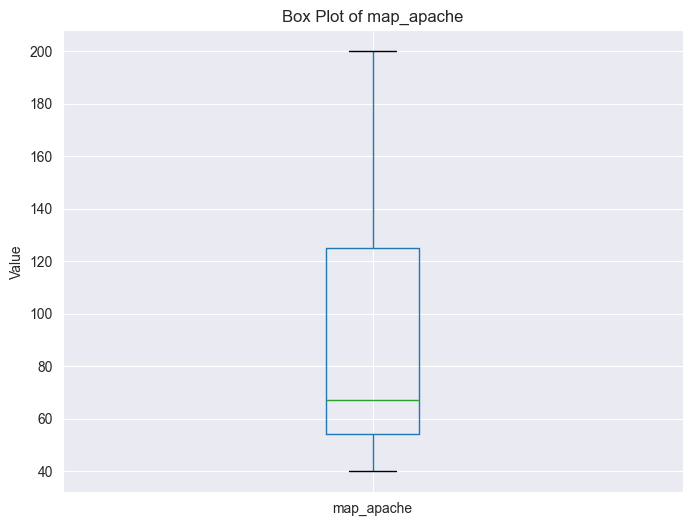

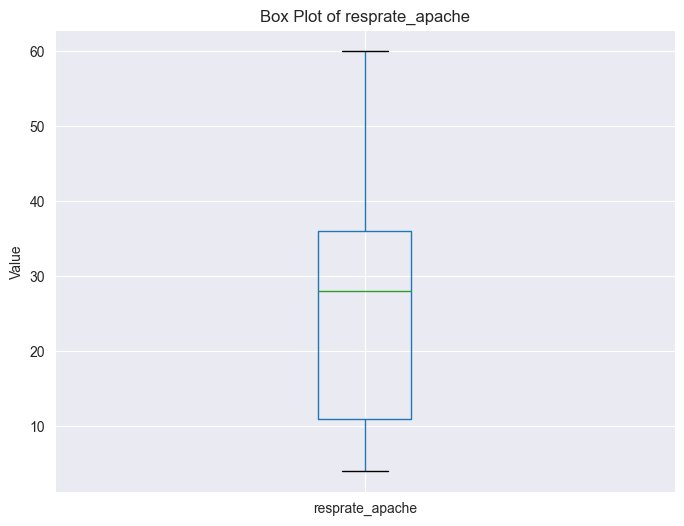

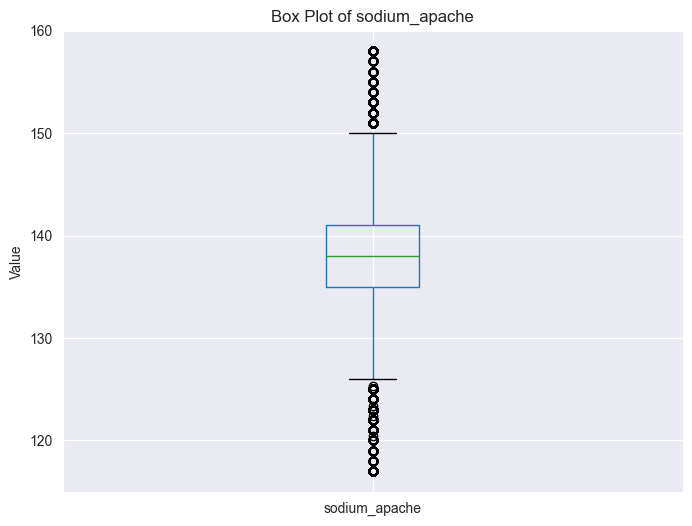

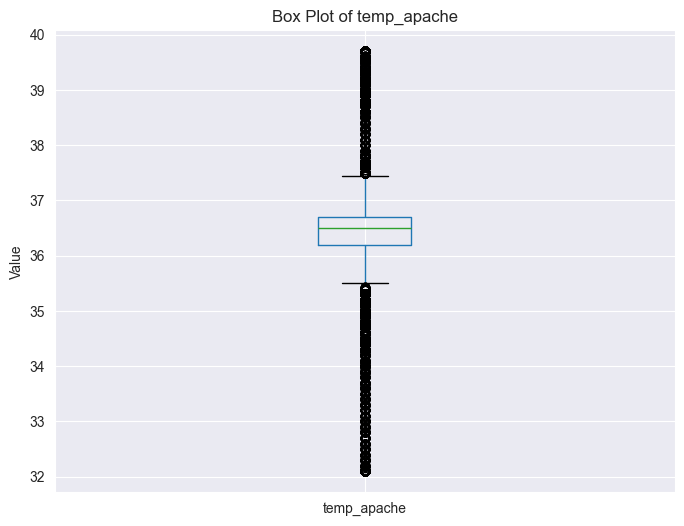

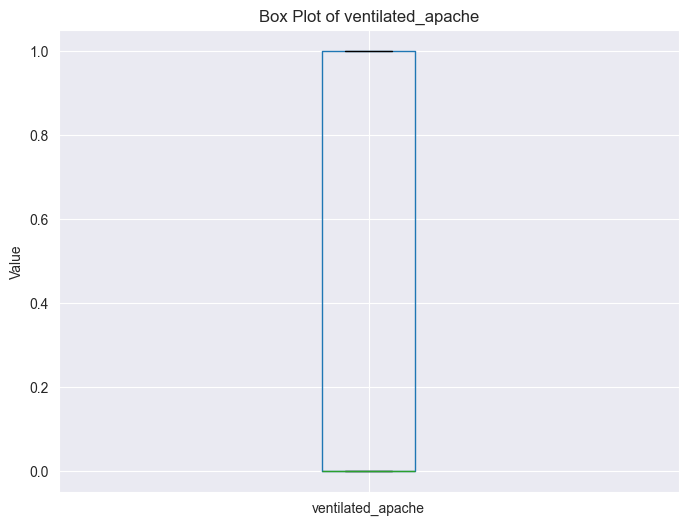

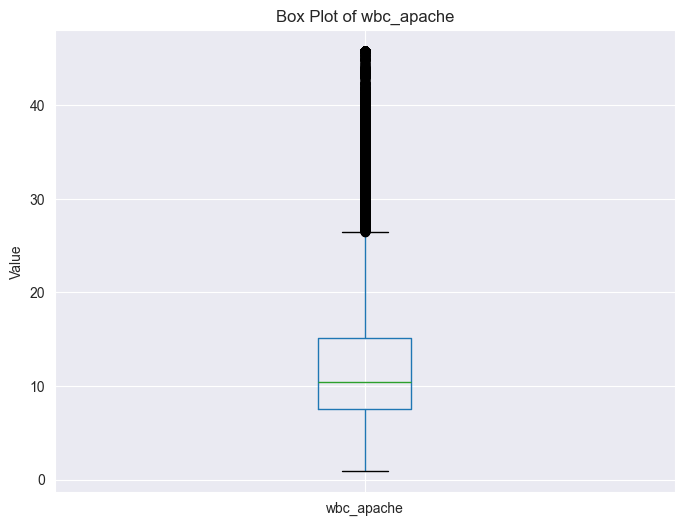

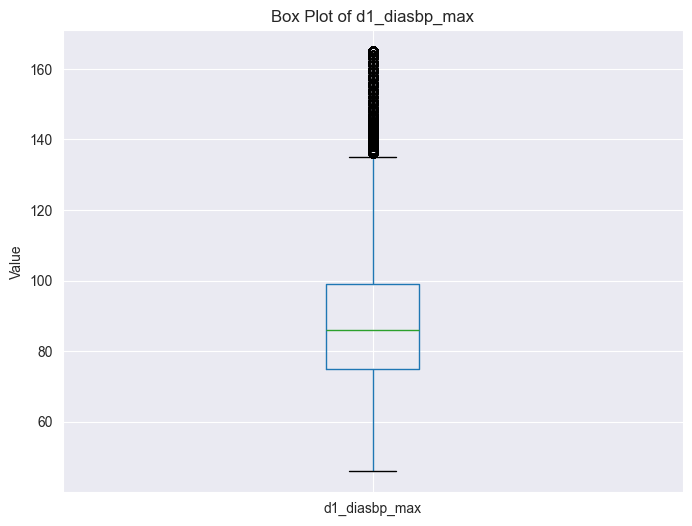

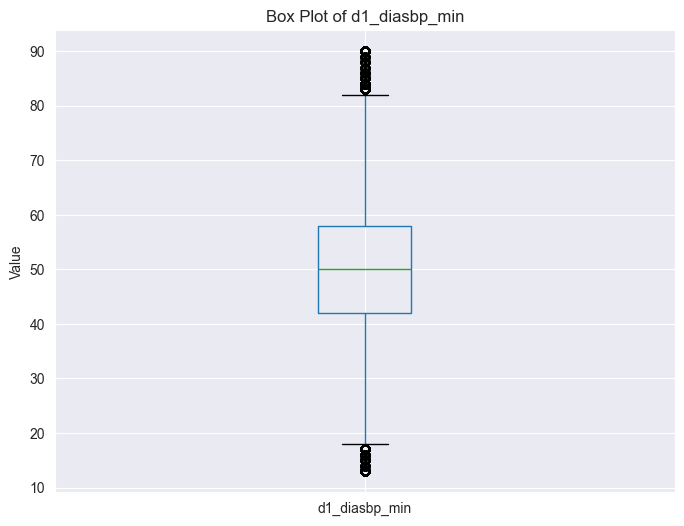

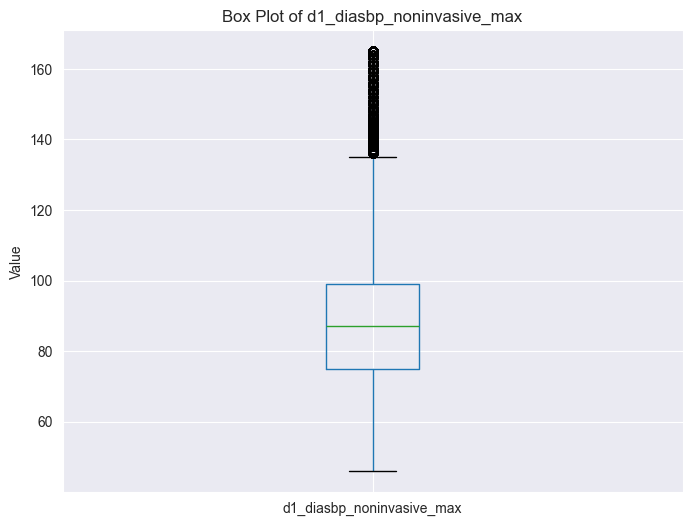

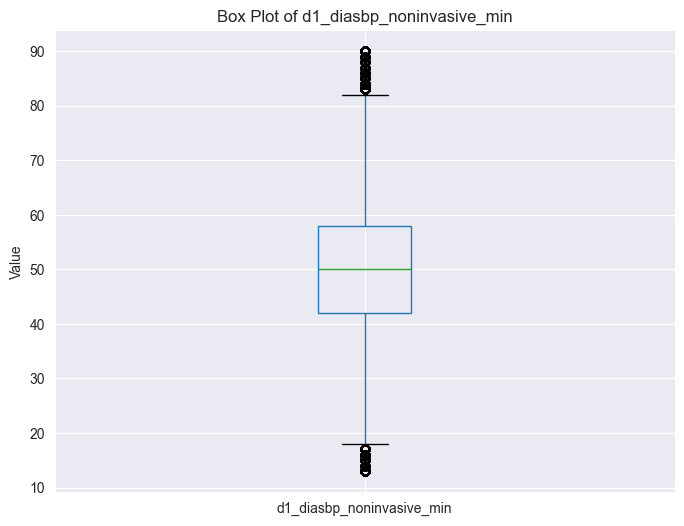

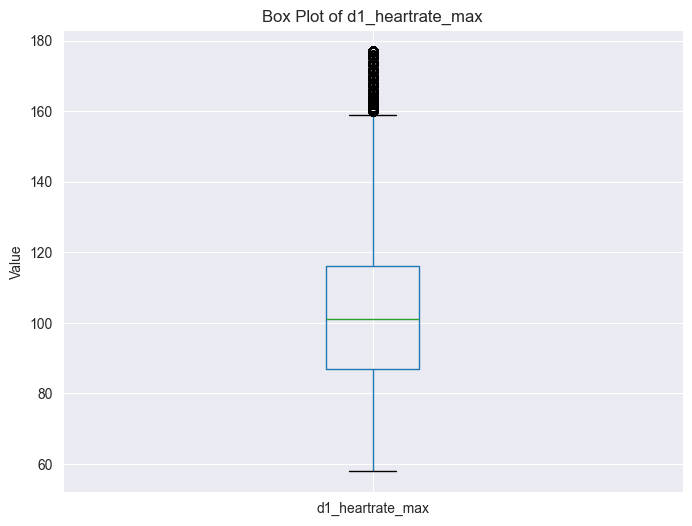

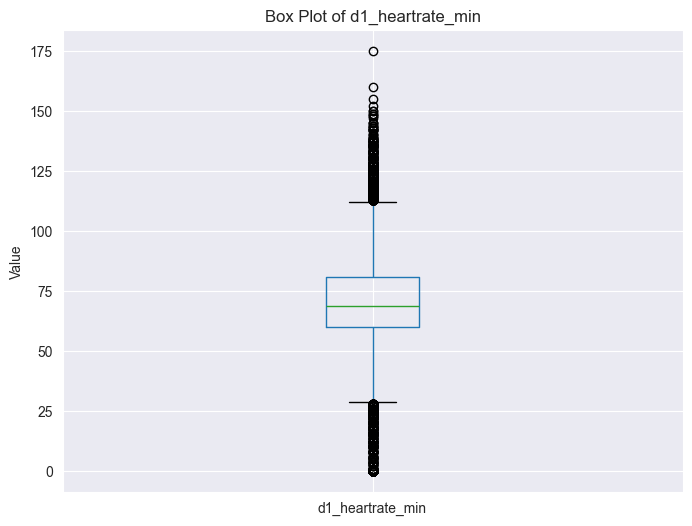

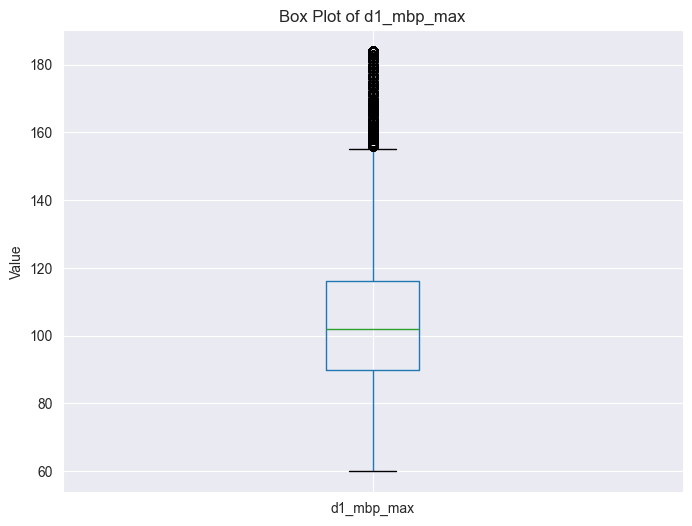

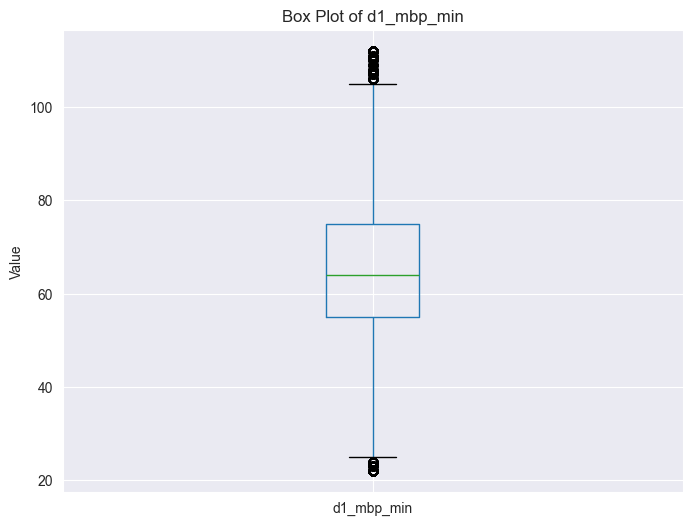

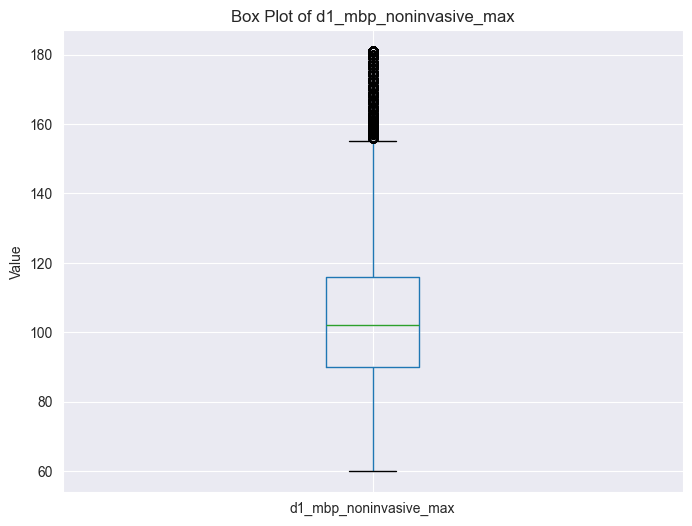

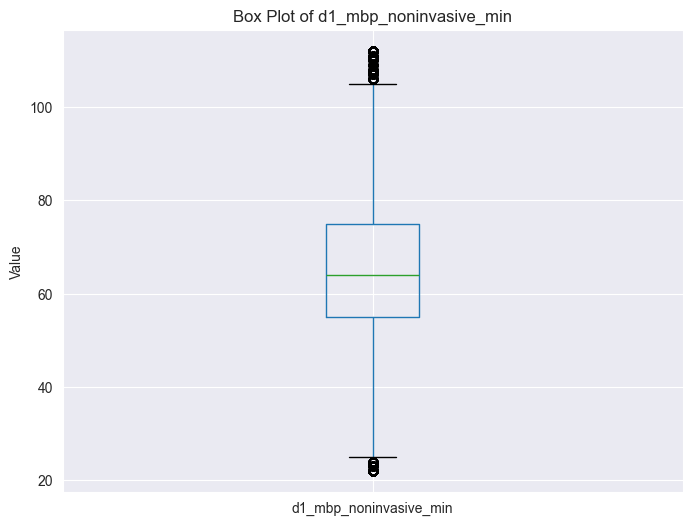

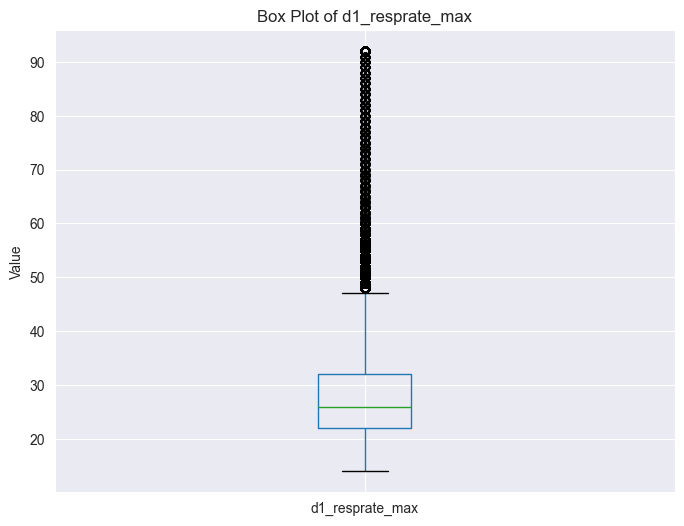

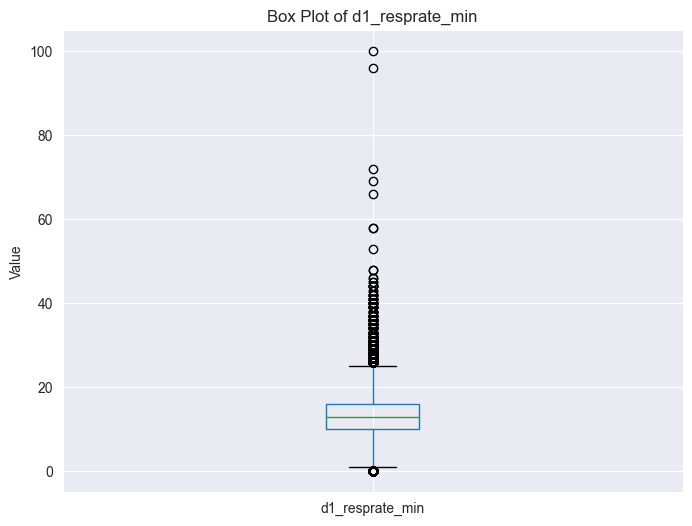

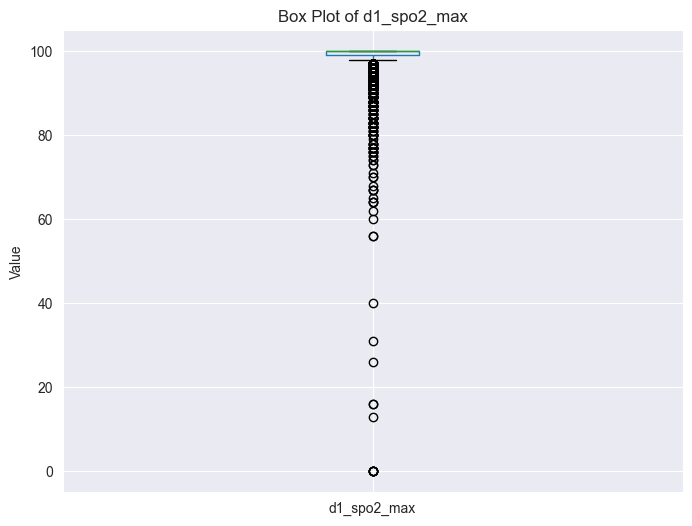

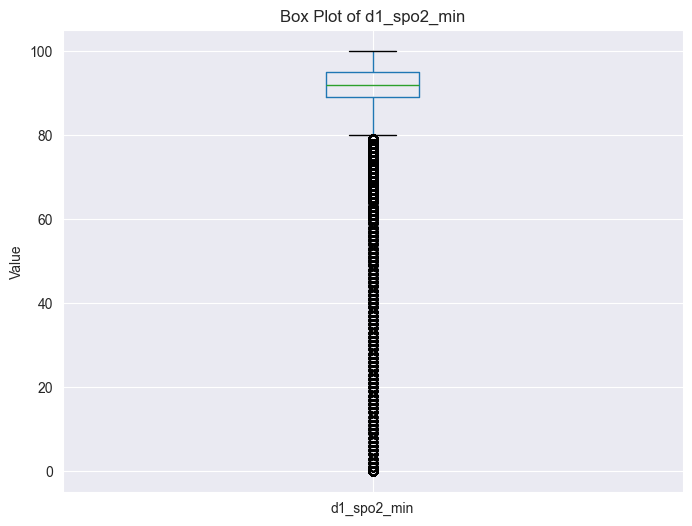

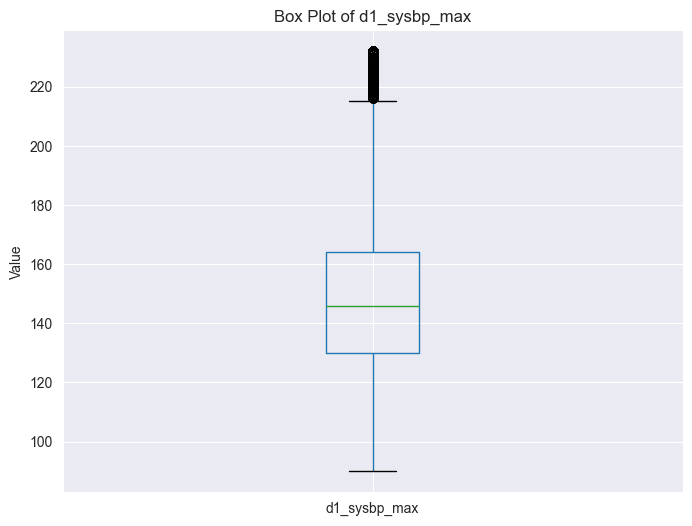

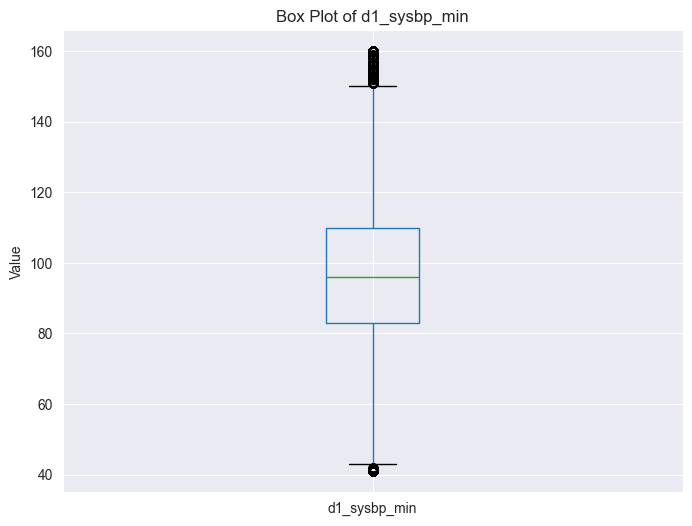

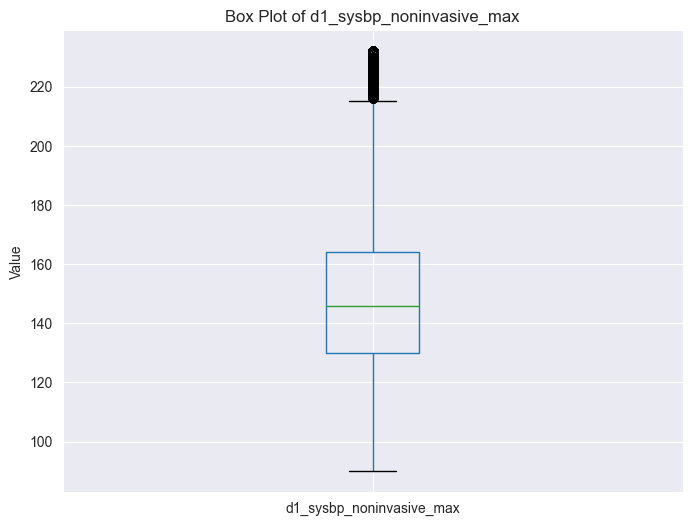

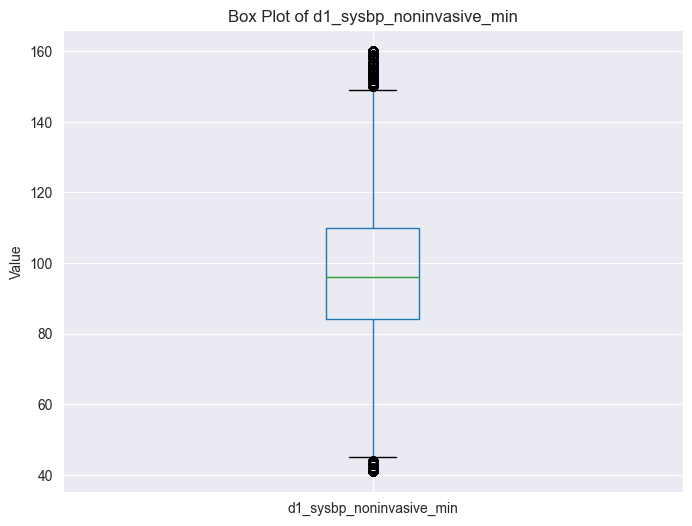

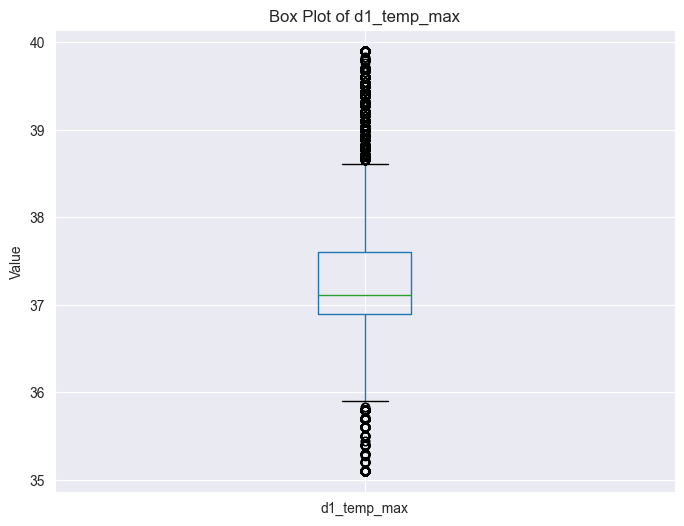

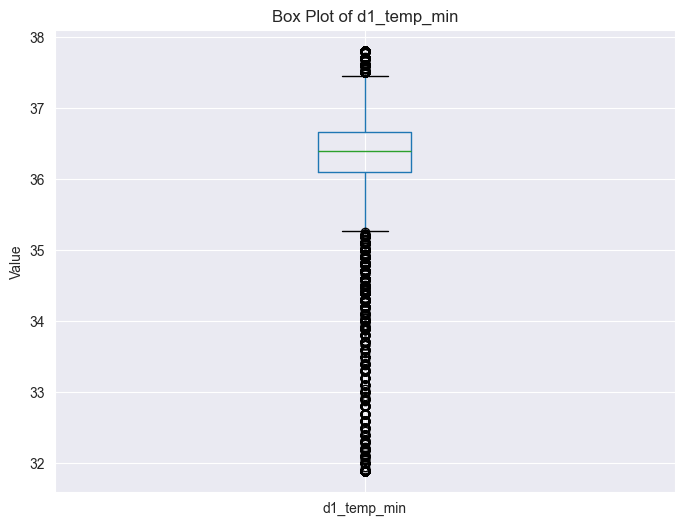

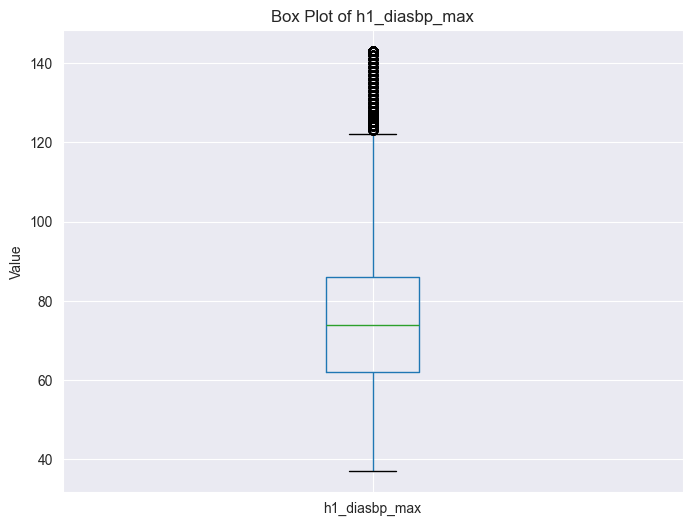

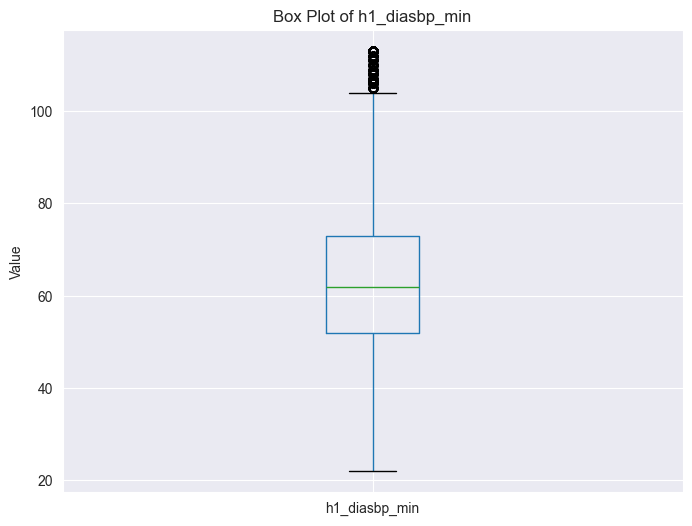

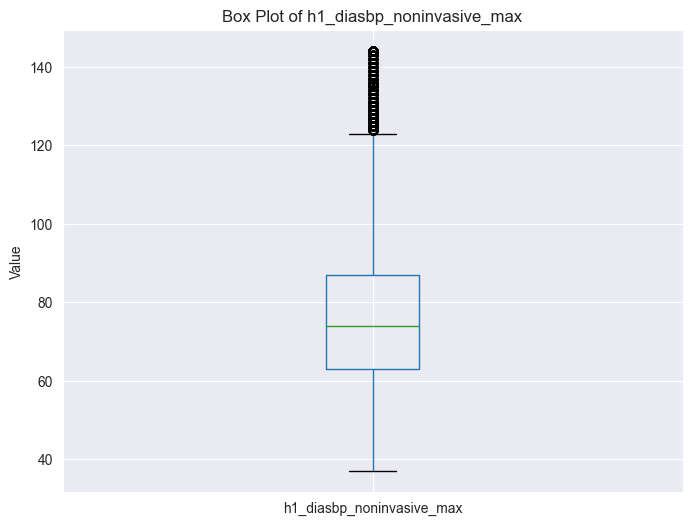

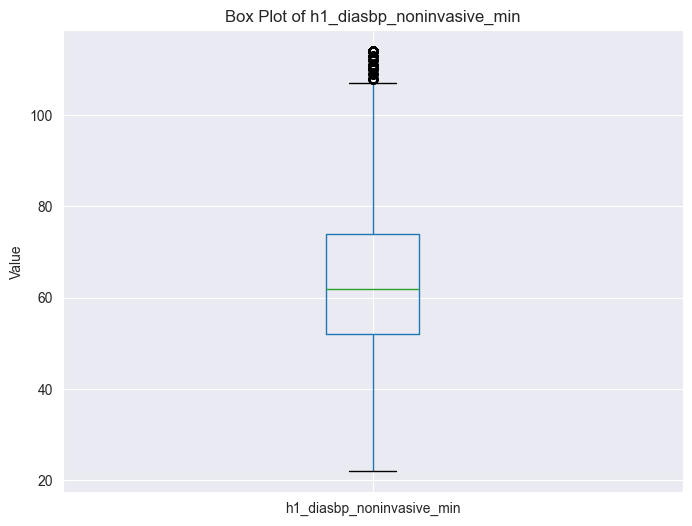

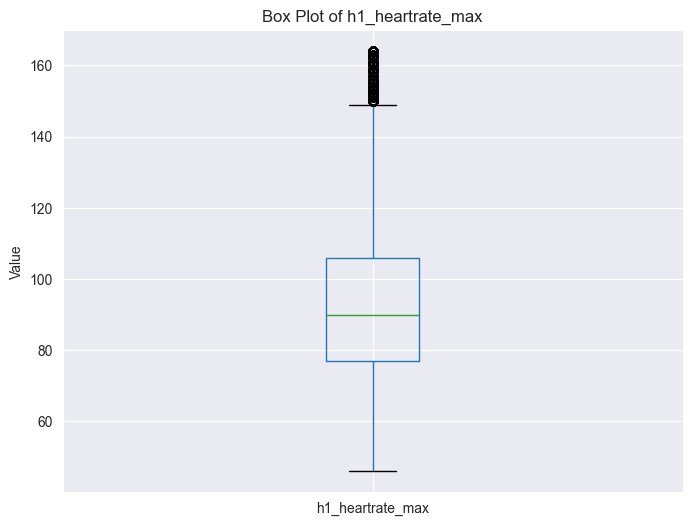

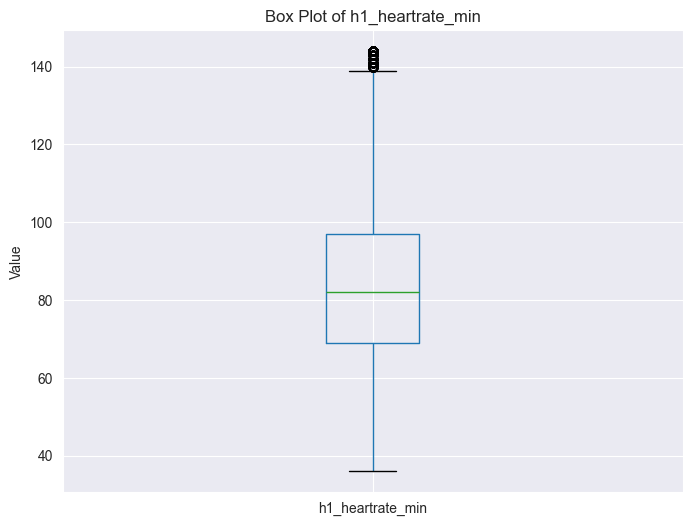

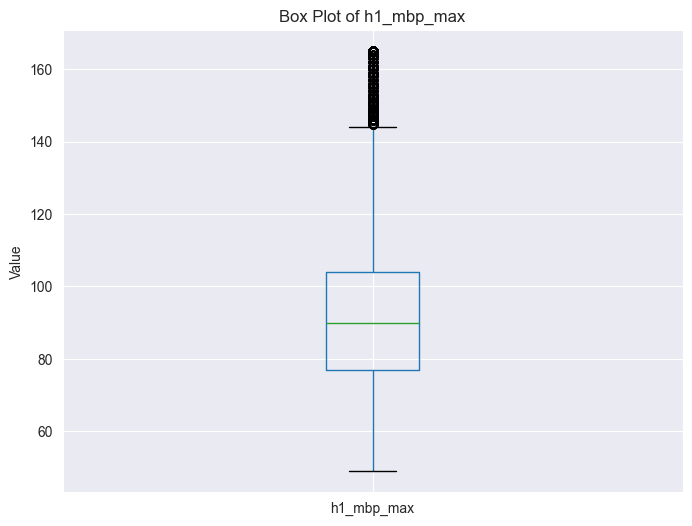

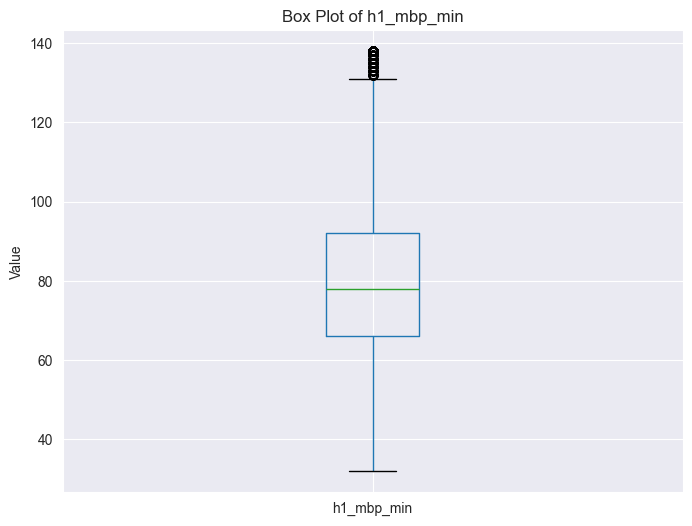

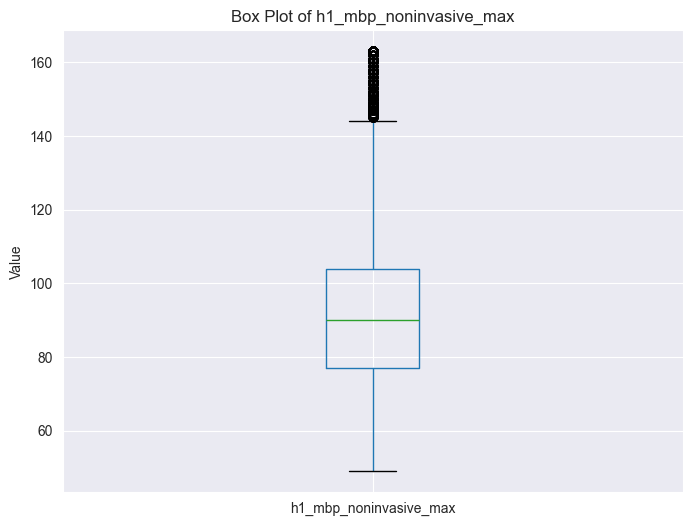

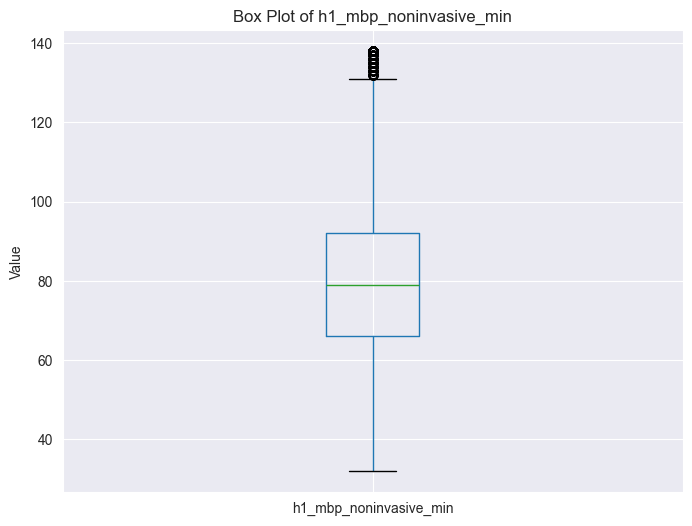

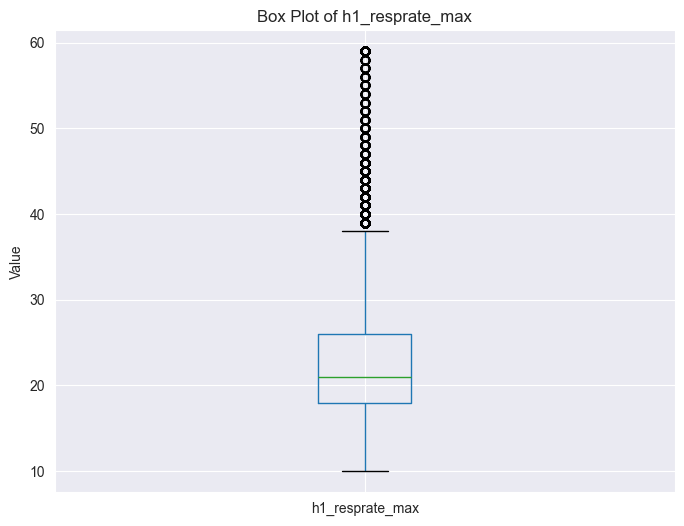

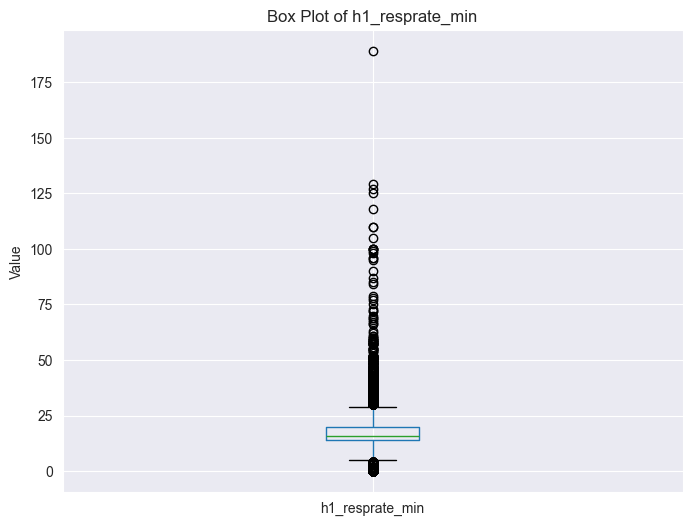

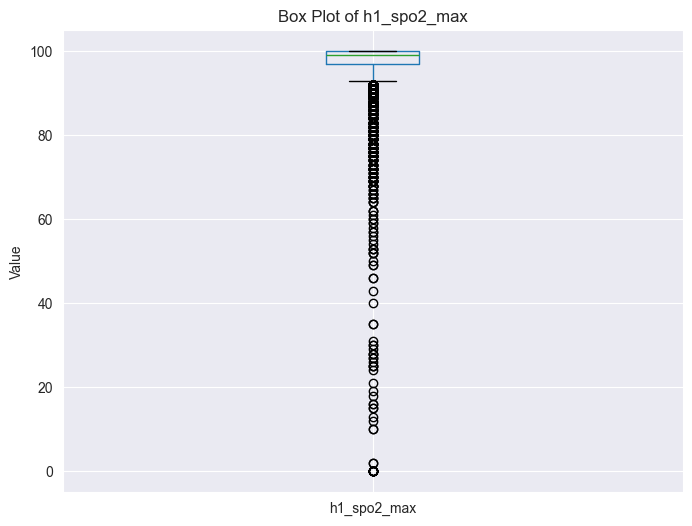

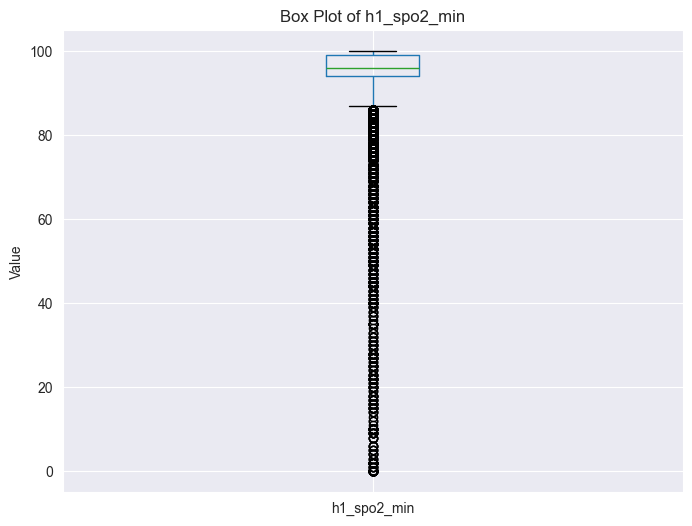

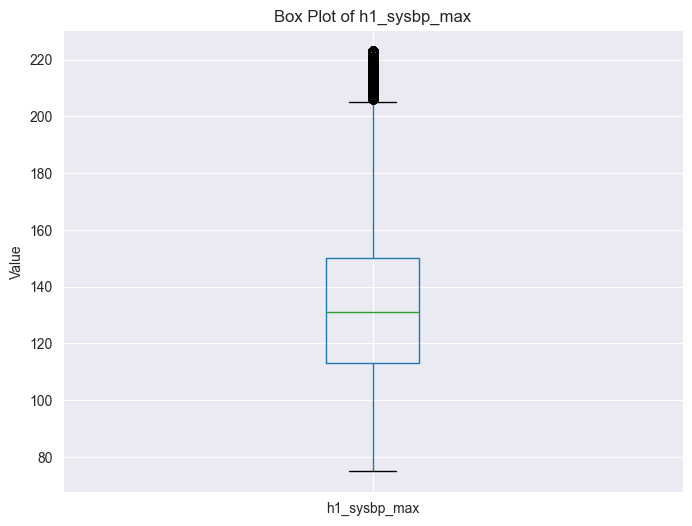

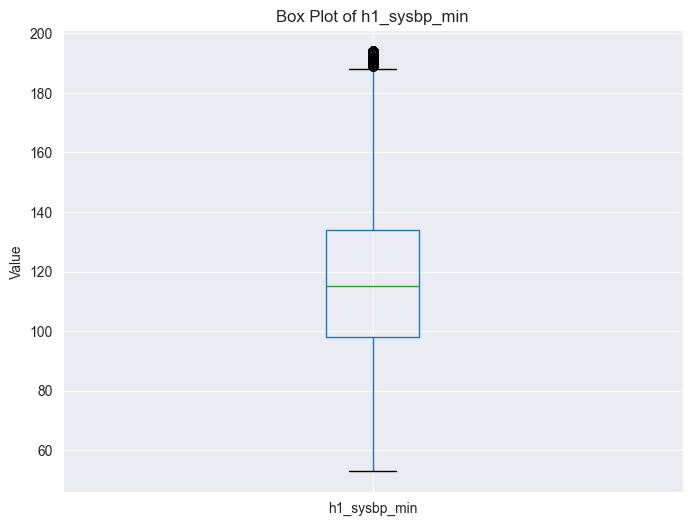

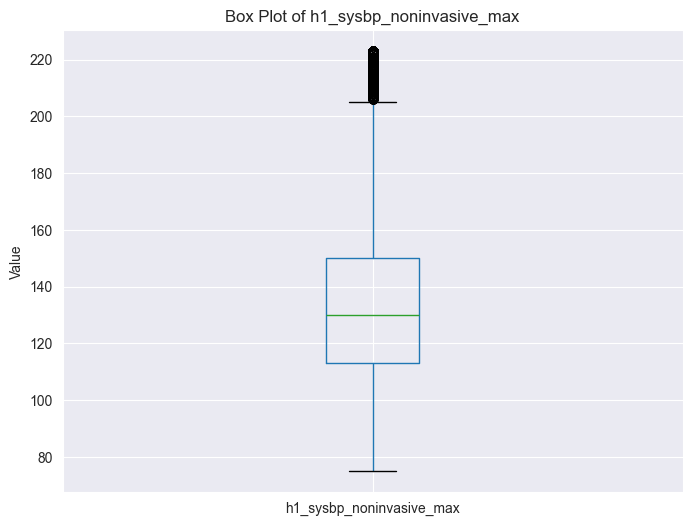

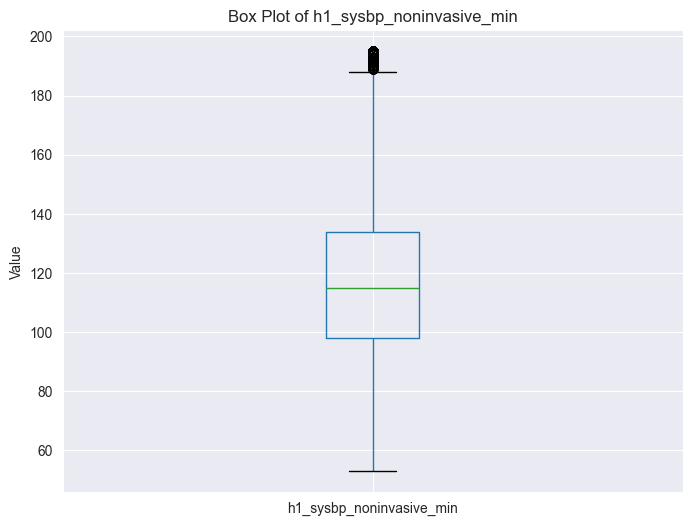

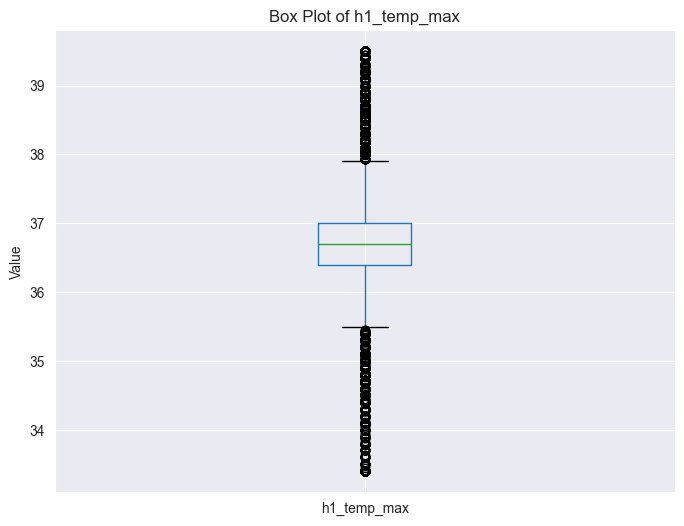

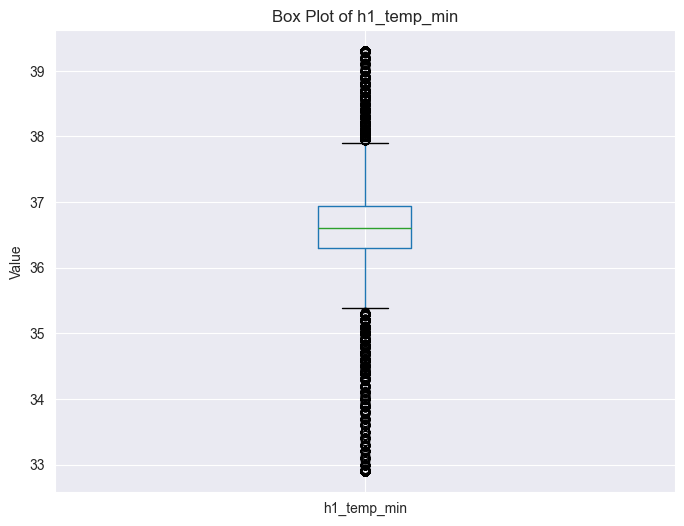

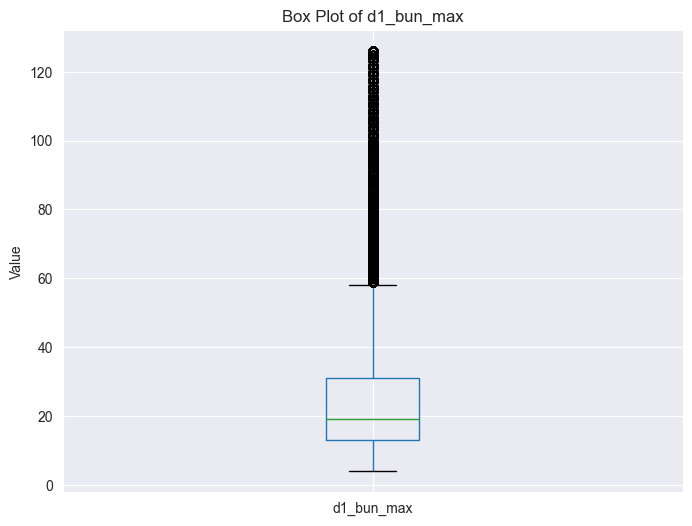

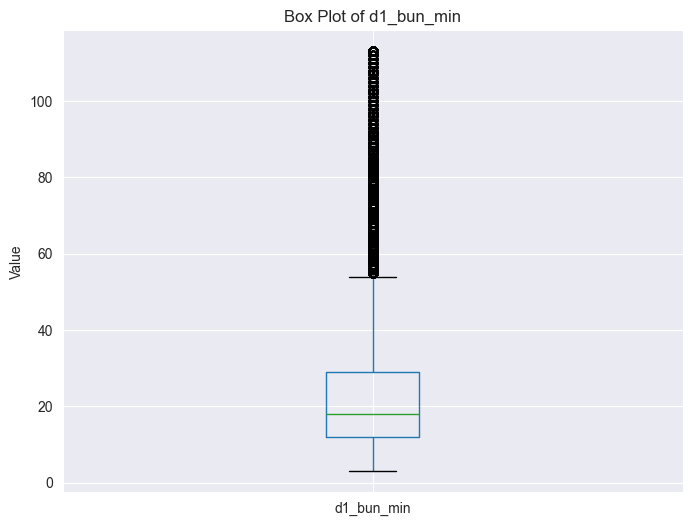

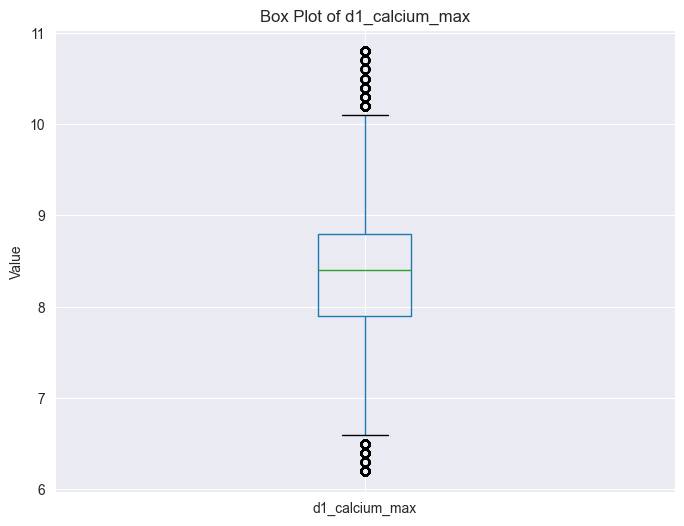

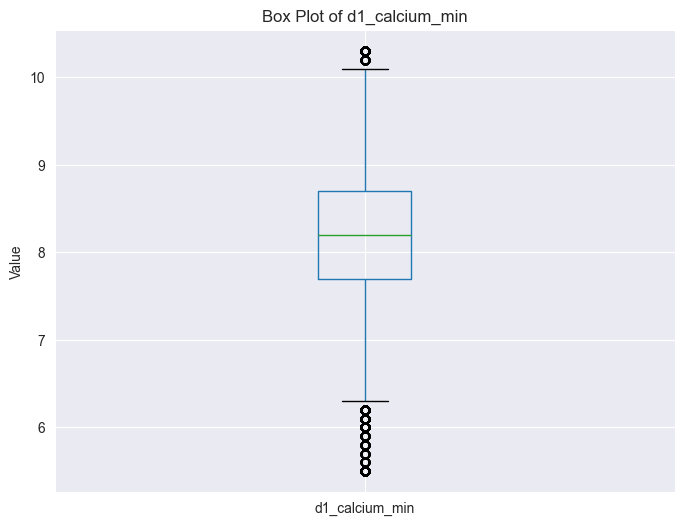

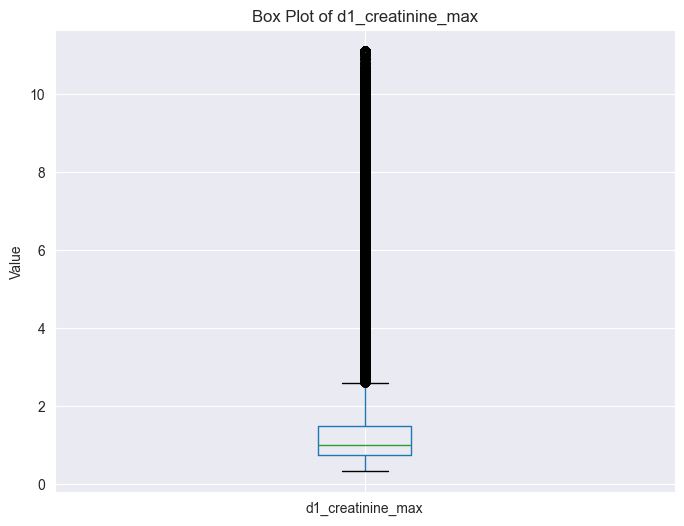

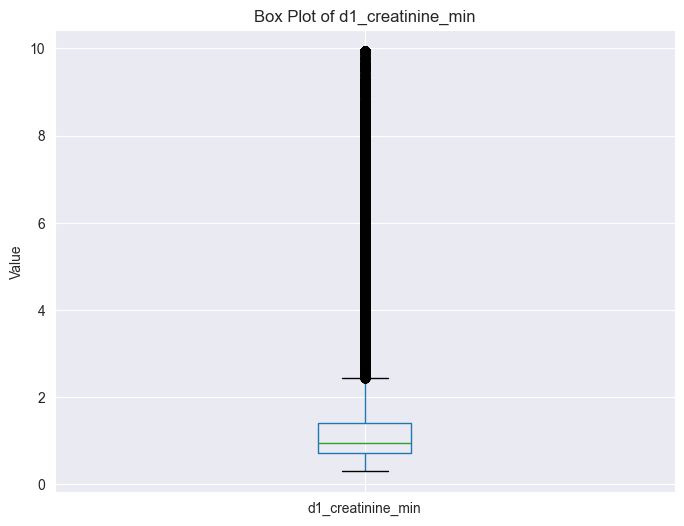

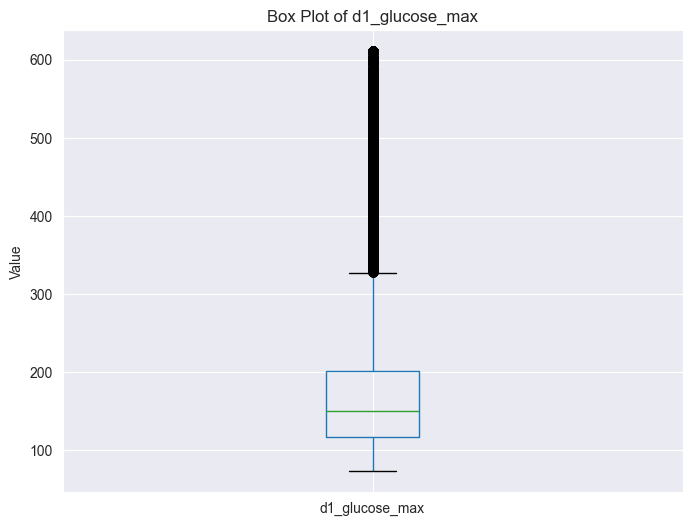

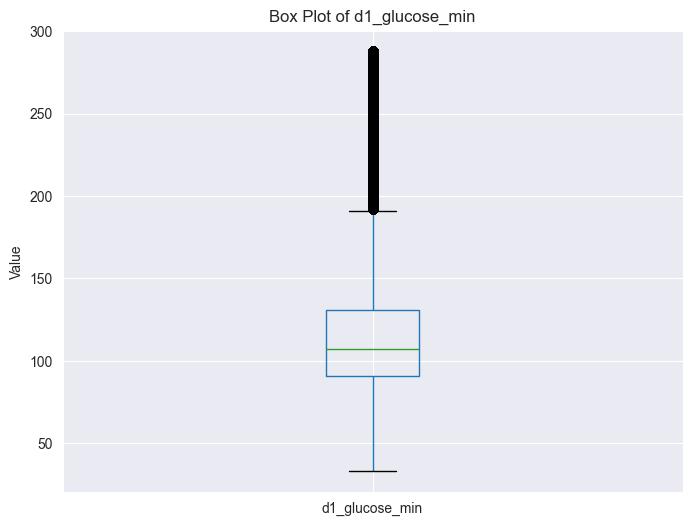

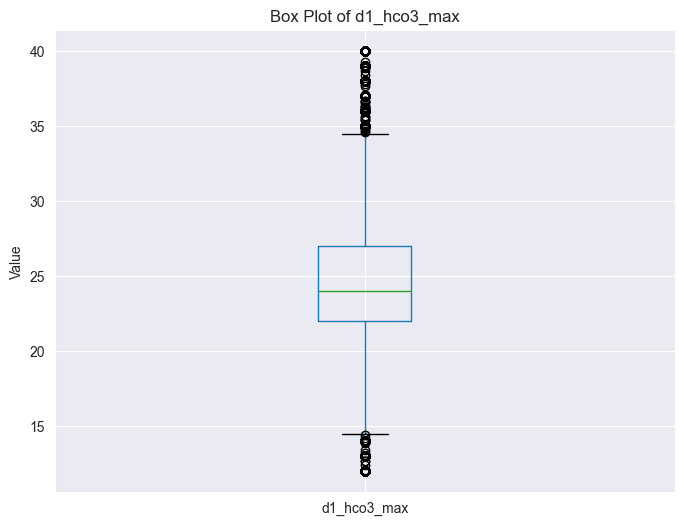

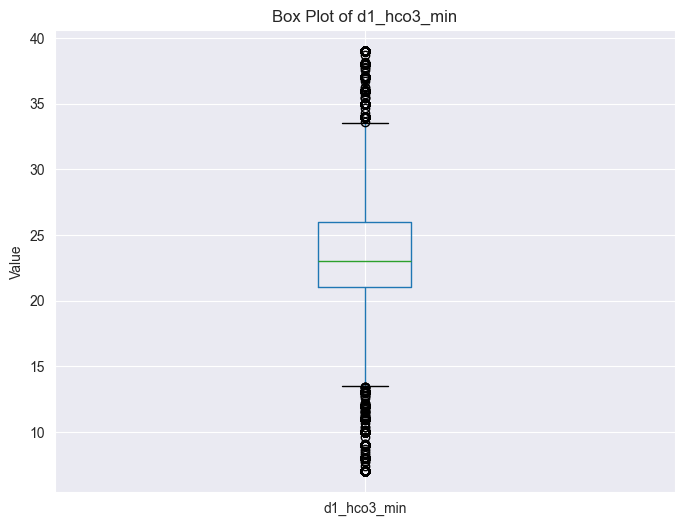

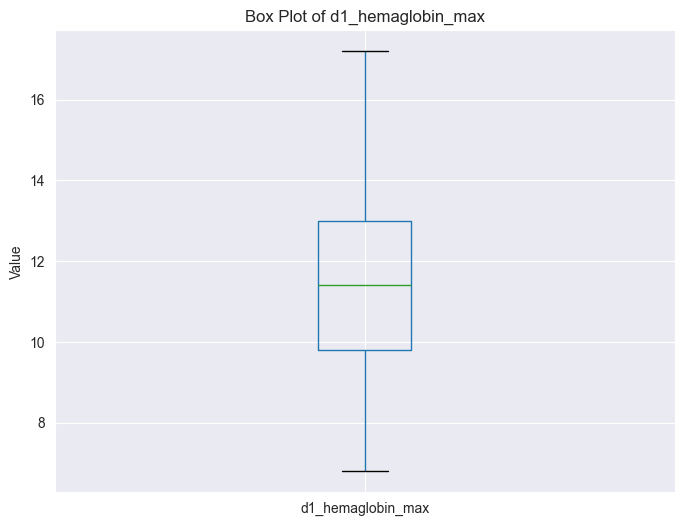

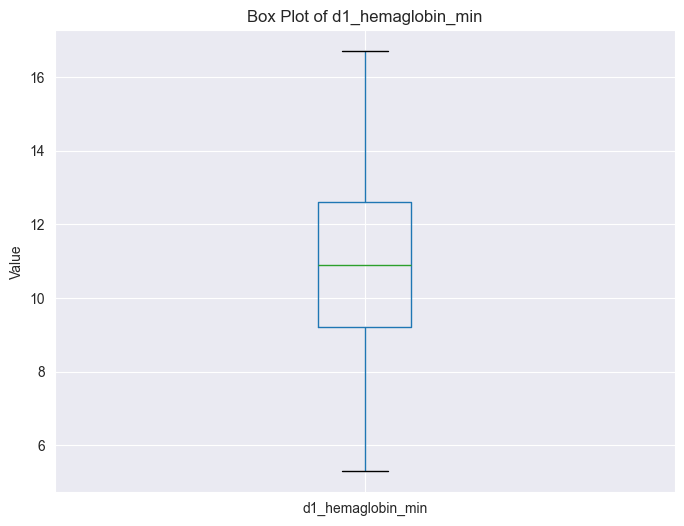

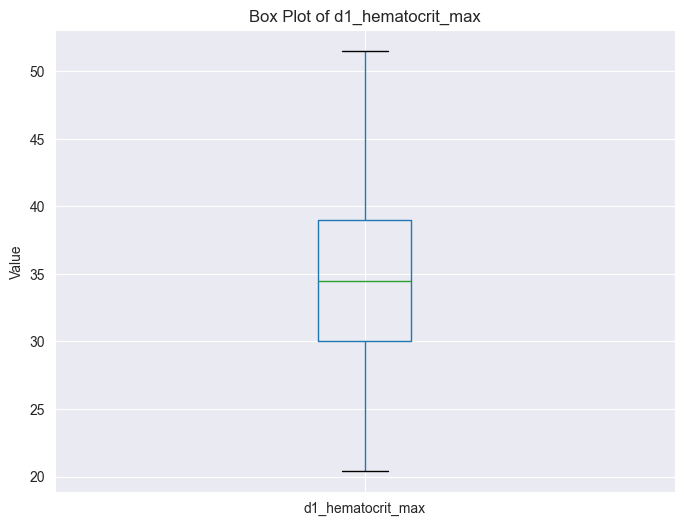

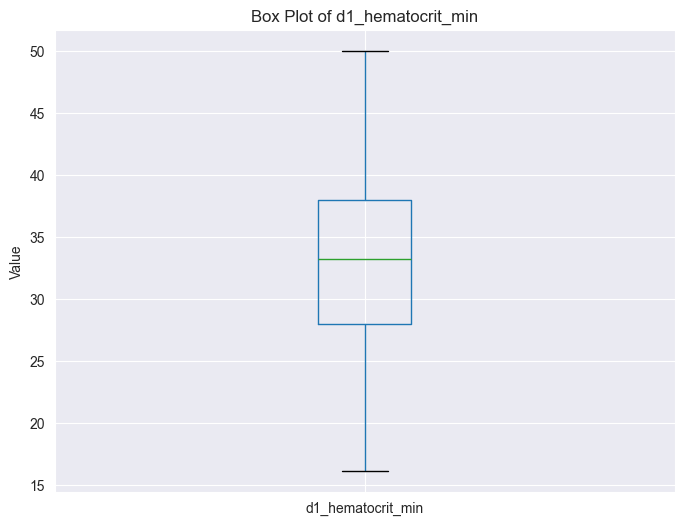

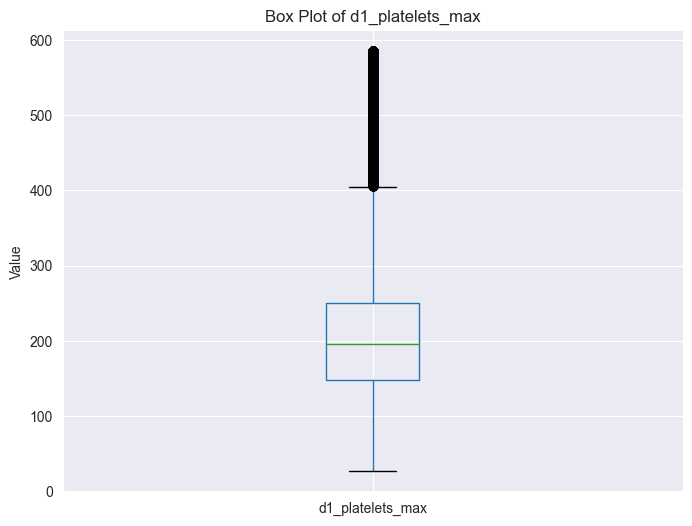

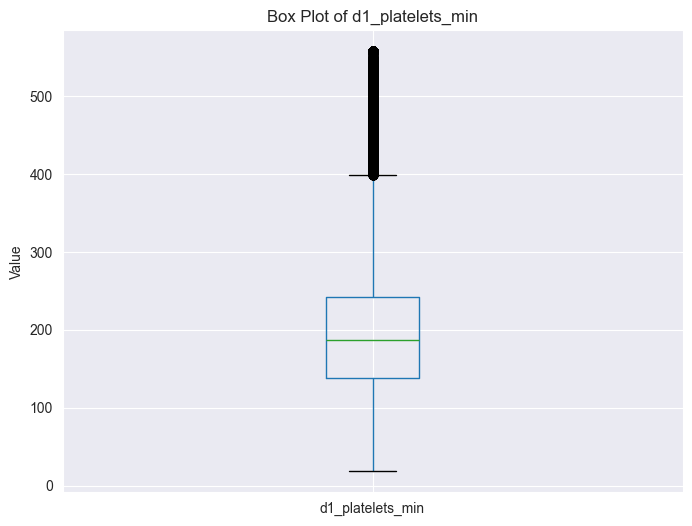

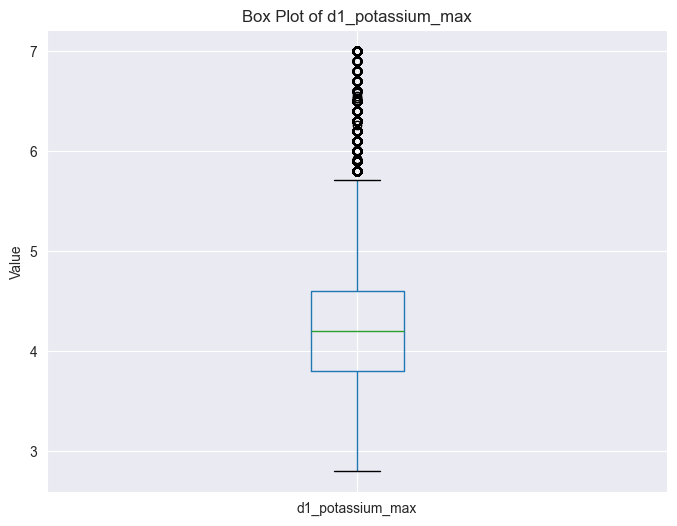

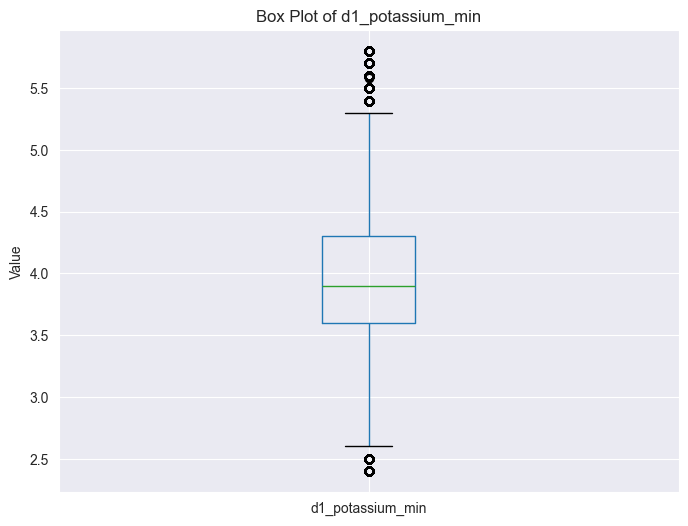

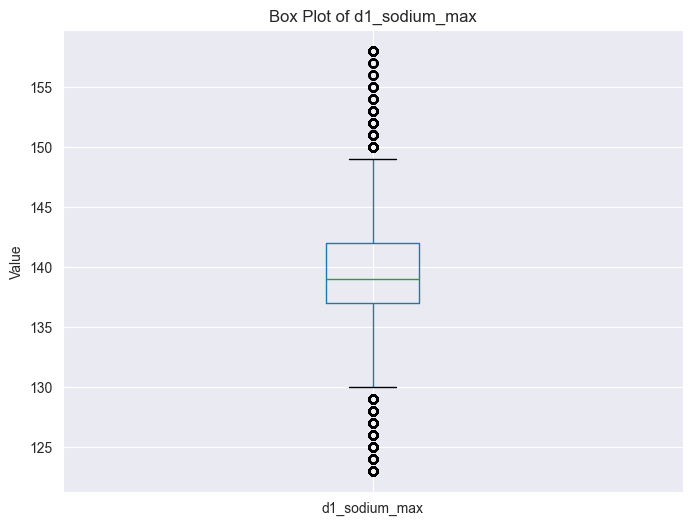

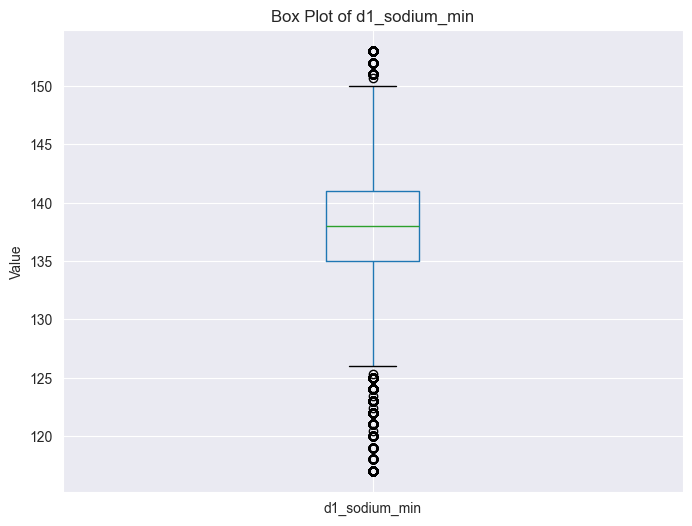

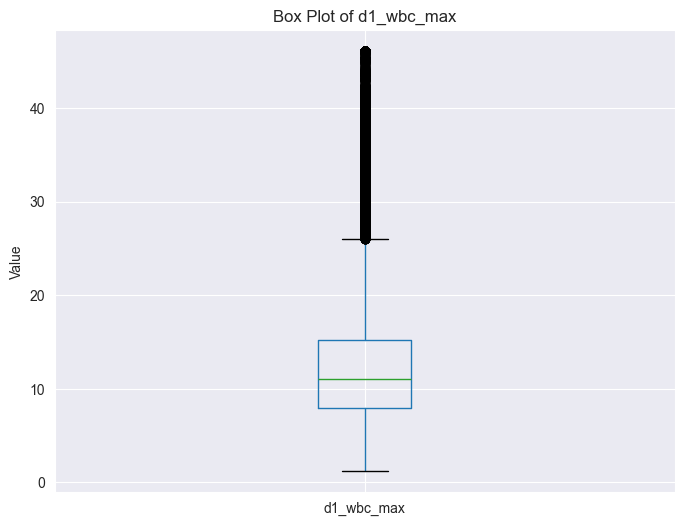

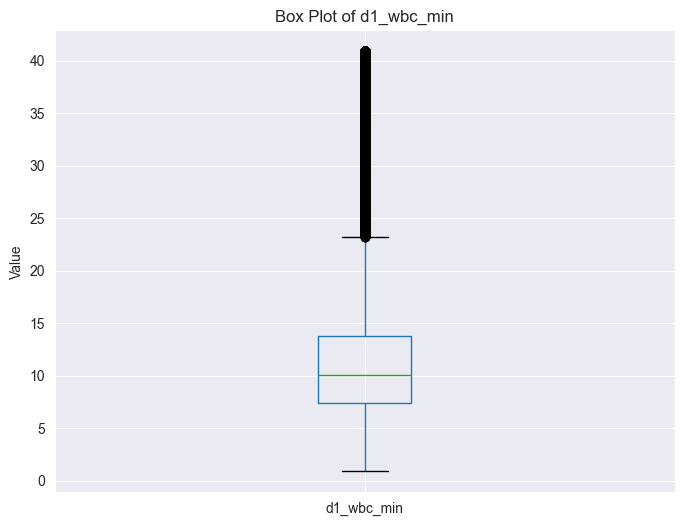

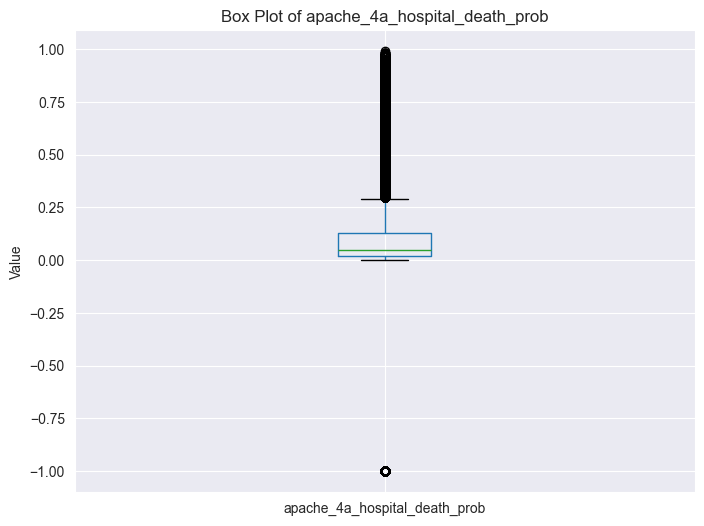

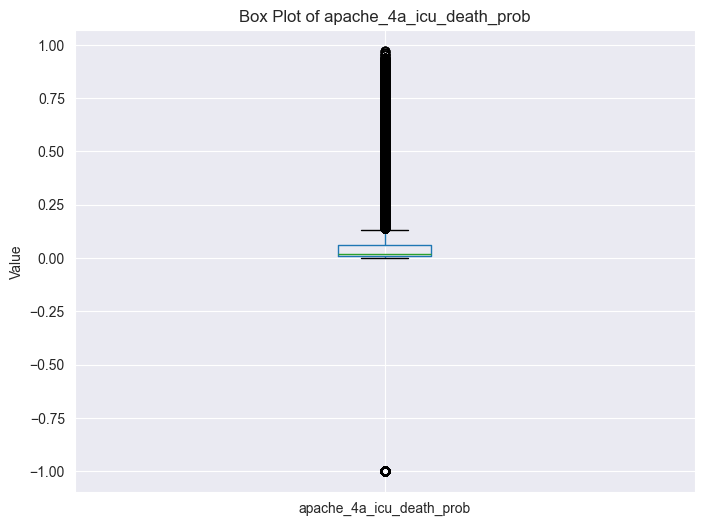

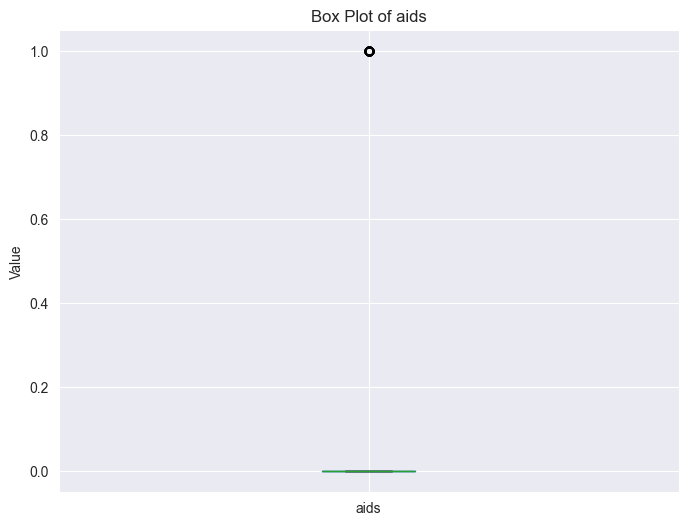

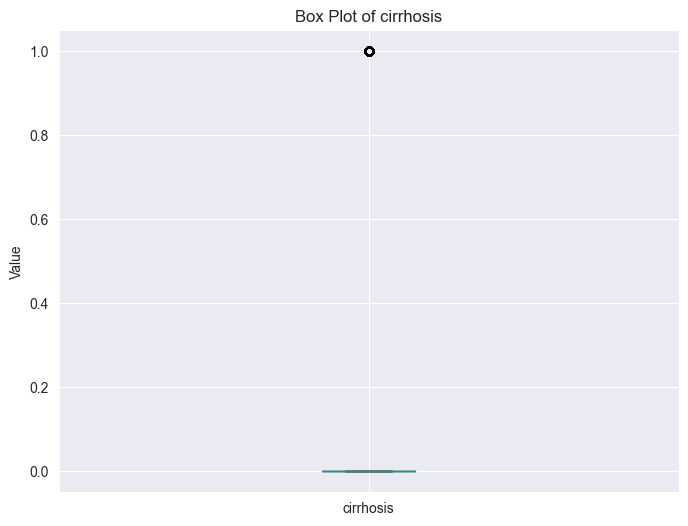

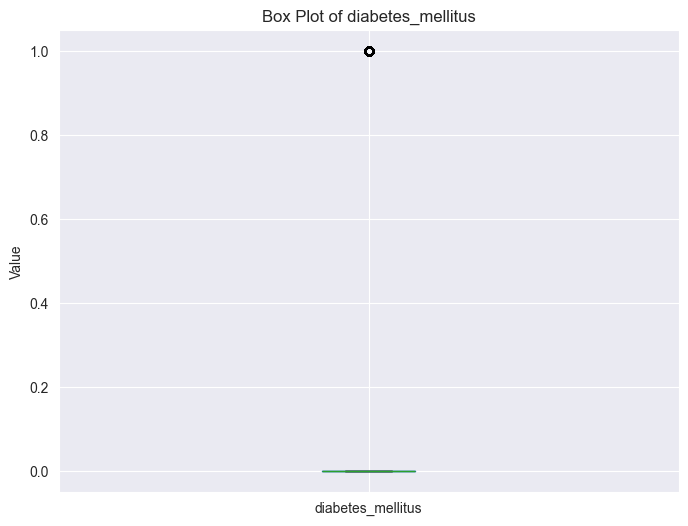

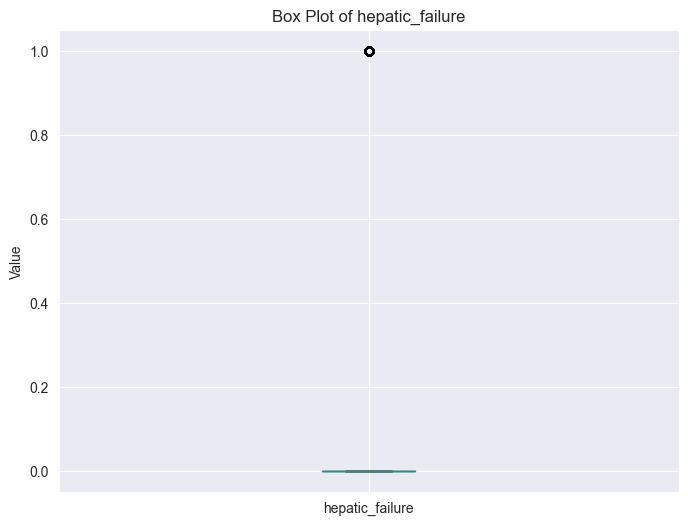

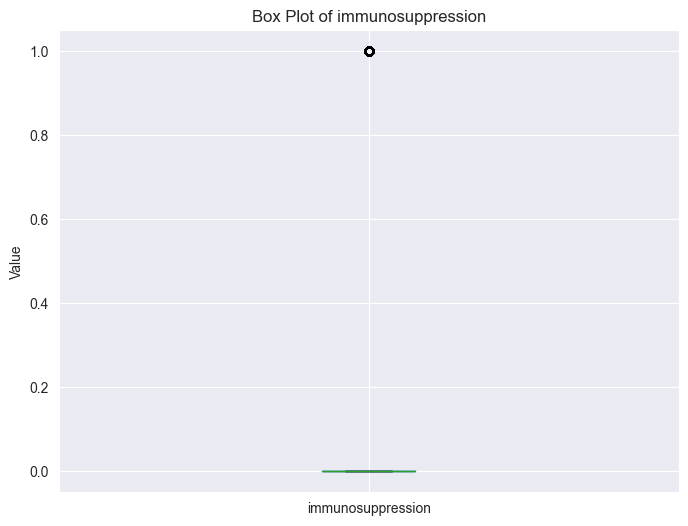

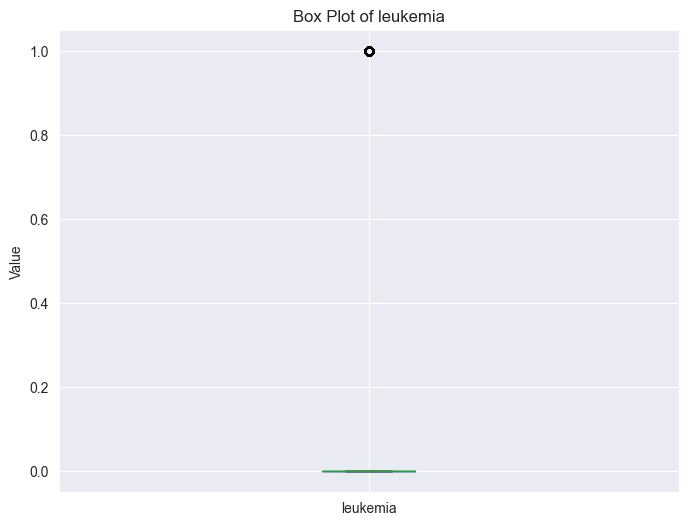

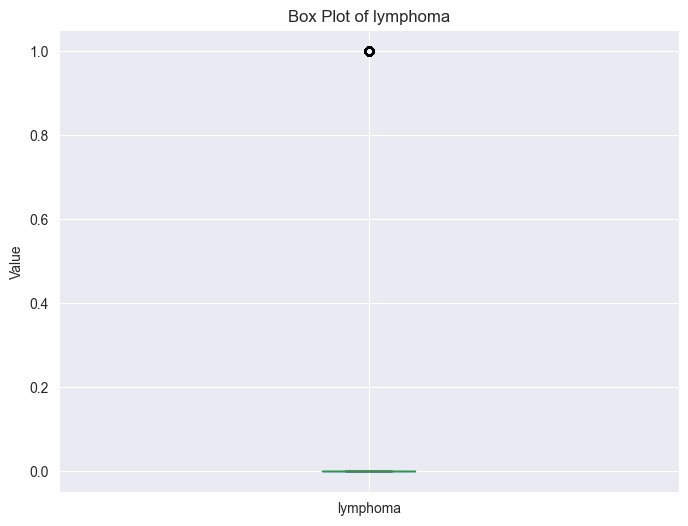

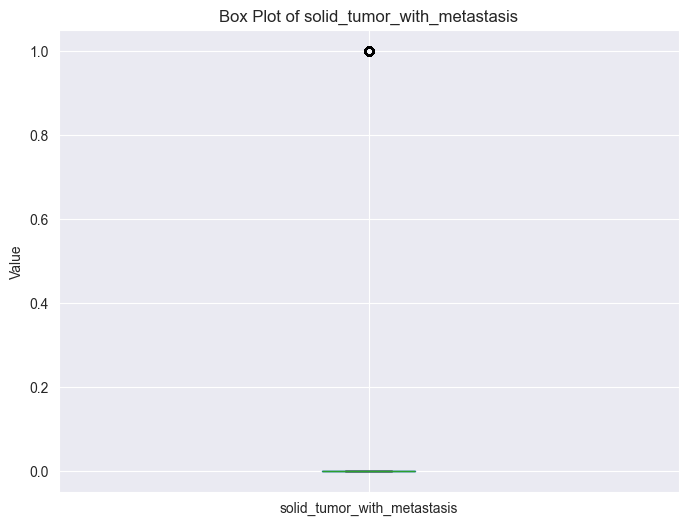

In [20]:
numeric_columns = df_dropped.select_dtypes(include=['int', 'float']).columns

# Iterate through numeric columns and plot box plots
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Value')
    plt.show()